# DX 601 Final Project

## Introduction

In this project, I implemented the skills that I learned throughout MOD 1 by choosing one of many provided datasets that caught my interest, then performing a variety of analysis techniques.

This project was meant to ensure that I understood how to implement these concepts in a real-world scenario.

## Allowed Imports

For this project, I was forbidden to use modules that were not loaded in this template to ensure a proper assessment of my knowledge and skills.

The modules that were allowed for this project were the following:

In [ ]:
import math
import sys

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Analyzing the Breast Cancer Wisconsin (Diagnostic) Dataset

### Step 1: Choosing the Dataset

For this project, I chose one of the following data sets to analyze, then loaded the dataset and showed a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))

<h4>The Breast Cancer Wisconsin (Diagnostic) dataset</h4>
<p>I chose the Breast Cancer Wisconsin (Diagnostic) dataset (which I will call the "BCWD dataset" from this point forward) as I find it to be an interesting, yet impactful, dataset with breast cancer mass data that is still relevant even 31 years after it was officially released.  It is specifically interesting to see the relationships between the different features, the subtypes of each feature (congregate mean, standard error, and maximum), and the target diagnosis.</p>
<p>The following shows the code necessary to import the PMLB version of the dataset using Pandas's "read_csv" method, then the output of the first 10 rows of the first 10 columns.</p>

In [ ]:
# YOUR CODE HERE

breast_cancer_wisconsin_diagnostic = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/breast_cancer_wisconsin/breast_cancer_wisconsin.tsv.gz", sep="\t")
# breast_cancer_wisconsin_diagnostic = breast_cancer_wisconsin_diagnostic.dropna()

# First 10 rows for the first 10 columns:
breast_cancer_wisconsin_diagnostic.iloc[:10, :10]

,target,2,3,4,5,6,7,8,9,10
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030


<h4>Renaming the PMLB Columns</h4>
<p>However, throughout working on this project, I had been finding it to be difficult to keep the column names as-is.  As a result, I decided to restructure my final project by renaming the columns to the corresponding names found in the non-PMLB version of the Breast Cancer Wisconsin Diagnostic dataset.</p>
<p>To do this, I had to search for a more suitable entry of the dataset as neither the official webpage in the UCI ML Repository or the associated GitHub repository had sufficient data to verify the match between the PMLB version and the non-PMLB version.  However, I found the <a href="https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data">associated Kaggle dataset</a> by the official account of the UCI ML Repository and, upon a simple investigation, I confirmed that the non-PMLB and the PMLB versions of the BCWD dataset were in the corresponding order.  As a result, I could confidently use this information to rename the columns.</p>
<p>I implemented this by creating two lists for the target and feature variables for the "P1" (non-PMLB) version of the BCWD dataset (mainly so that the p1_features could be called later on whenever necessary).  Then, I concatenated both the p1_target and p1_features lists into a single NumPy array "p1_names" and identified the PMLB version's column names as "p2_names" in the form of a NumPy array.  Finally, I instantiated the p2_names as string keys and the p1_names as string values in a single dictionary called "bcwd_names".</p>
<p>This code is as follows:</p>

In [ ]:
# data (as pandas dataframes)
p1_target = ["Diagnosis"]
p1_features = [
    "radius1",
    "texture1",
    "perimeter1",
    "area1",
    "smoothness1",
    "compactness1",
    "concavity1",
    "concave_points1",
    "symmetry1",
    "fractal_dimension1",
    "radius2",
    "texture2",
    "perimeter2",
    "area2",
    "smoothness2",
    "compactness2",
    "concavity2",
    "concave_points2",
    "symmetry2",
    "fractal_dimension2",
    "radius3",
    "texture3",
    "perimeter3",
    "area3",
    "smoothness3",
    "compactness3",
    "concavity3",
    "concave_points3",
    "symmetry3",
    "fractal_dimension3"
]

# Concatenate the p1_target and p1_features lists into a Numpy array:
p1_names = np.concatenate([p1_target, p1_features])

# Assign to p2_names a Numpy array instantiation of the Breast Cancer Wisconsin Diagnostic dataset's columns:
p2_names = np.asarray(breast_cancer_wisconsin_diagnostic.columns)

# Dictionary to reference columns:
bcwd_names = {str(pmlb_col): str(real_col) for pmlb_col, real_col in zip(p2_names, p1_names)}

# print("The following are the contents of the \"bcwd_names\" dictionary:")
# for key, value in bcwd_names.items():
#     print(f"PMLB column \"{key}\" corresponds with non-PMLB column \"{value}\" for the BCWD dataset.")

<p>I, then, chose to validate these names by ensuring that they match the corresponding column names in both the non-PMLB and PMLB version of the BCWD dataset.  After which, I could confidently state that the print outputs above show the correct corresponding column pairs between the PMLB and non-PMLB versions of the BCWD dataset.</p>

<h4>Changing the column names</h4>
<p>Now that I have specifically named each corresponding column, I renamed the dataset accordingly.  To be on the safe side, I created a copy of the original non-PMLB version of the dataset, then renamed the columns, accordingly, on said copy.  In the following code, I perform this action, then show the values of the first 10 rows of the first 10 columns of the renamed dataset.</p>

In [ ]:
# Renamed BCWD dataset
bcwd_renamed = breast_cancer_wisconsin_diagnostic.copy().rename(columns=bcwd_names)
bcwd_renamed.iloc[:10, :10]

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030


<p>Finally, for clarity and simplicity, I created a features and target subset of the BCWD dataset.</p>

In [ ]:
# Features
bcwd_features = bcwd_renamed.drop(["Diagnosis"], axis=1)

# Target
bcwd_target = bcwd_renamed["Diagnosis"]

### Step 2: Describing the Dataset

<p>The following is a list of the different columns found in the BCWD dataset, showing the corresponding PMLB and non-PMLB column names:</p>

In [ ]:
print("The following are the contents of the \"bcwd_names\" dictionary:")
for key, value in bcwd_names.items():
    print(f"• PMLB column \"{key}\" corresponds with non-PMLB column feature \"{value}\" in the BCWD dataset.")

The following are the contents of the "bcwd_names" dictionary:
• PMLB column "target" corresponds with non-PMLB column feature "Diagnosis" in the BCWD dataset.
• PMLB column "2" corresponds with non-PMLB column feature "radius1" in the BCWD dataset.
• PMLB column "3" corresponds with non-PMLB column feature "texture1" in the BCWD dataset.
• PMLB column "4" corresponds with non-PMLB column feature "perimeter1" in the BCWD dataset.
• PMLB column "5" corresponds with non-PMLB column feature "area1" in the BCWD dataset.
• PMLB column "6" corresponds with non-PMLB column feature "smoothness1" in the BCWD dataset.
• PMLB column "7" corresponds with non-PMLB column feature "compactness1" in the BCWD dataset.
• PMLB column "8" corresponds with non-PMLB column feature "concavity1" in the BCWD dataset.
• PMLB column "9" corresponds with non-PMLB column feature "concave_points1" in the BCWD dataset.
• PMLB column "10" corresponds with non-PMLB column feature "symmetry1" in the BCWD dataset.
• PML

<h4>What each feature means</h4>
<p>The original dataset contained features for the ID (which is not present in the PMLB version), the Diagnosis feature (named "target" in the PMLB version), and 10 descriptive features denoting the following characteristics of each mass based off of "a digitized image of a fine needle aspirate (FNA)" of said breast mass describing the "characteristics of the cell nuclei present in the image":</p>
<ul>
    <li>radius.</li>
    <li>texture.</li>
    <li>perimeter.</li>
    <li>area.</li>
    <li>smoothness.</li>
    <li>compactness.</li>
    <li>concavity.</li>
    <li>concave_points.</li>
    <li>symmetry.</li>
    <li>fractal_dimension.</li>
</ul>
<p>Additionally, there are three different columns denoting each feature.  Each column with "1" ("feature" + "1") contains the mean figure for all of the cell nuclei present in each image.  Each column with "2" ("feature" + "2") contains the standard error figure for the cell nuclei present in each image.  Finally, each column with "3" ("feature" + "3") contains the maximum value (describing the worst or largest characteristic) for said feature among all cell nuclei in the image, describing specifically the largest (or worst) cell nucleus in the image.</p>
<p>To reflect this knowledge, I thought that it would be a good idea to semi-automate this information about each characteristic.  So, I started by using the following print statements to determine where each characteristic was located in the "p1_names" list.</p>

In [ ]:
print("Mean values:", p1_names[1:11])
print()
print("Standard error values:", p1_names[11:21])
print()
print("Maximum values:", p1_names[21:])

Mean values: ['radius1' 'texture1' 'perimeter1' 'area1' 'smoothness1' 'compactness1'
 'concavity1' 'concave_points1' 'symmetry1' 'fractal_dimension1']

Standard error values: ['radius2' 'texture2' 'perimeter2' 'area2' 'smoothness2' 'compactness2'
 'concavity2' 'concave_points2' 'symmetry2' 'fractal_dimension2']

Maximum values: ['radius3' 'texture3' 'perimeter3' 'area3' 'smoothness3' 'compactness3'
 'concavity3' 'concave_points3' 'symmetry3' 'fractal_dimension3']


<p>Next, I created the "feature_check" function, which takes in the "name" parameter to output a specified message.  This specified message uses the "name" parameter to generate a "char_name" variable, which is the same as the non-PMLB column name, without the corresponding number to determine whether the feature denotes the mean, standard error, or maximum value for a set of breast mass cell nuclei for each observation.  However, I implemented an if-elif-else control flow to determine whether the name is associated with the first set of 10 features, the second set of 10 features, or the third set of 10 features, or if it is the target variable.  Based on the determination by the control flow, the function outputs the relevant string (to be printed out) using the "char_name" variable.</p>
<p>The code for this function can be found in the Python cell below:</p>

In [ ]:
def feature_check(name):
    char_name = bcwd_names[name][:-1]

    if name in p2_names[1:11]:
        return [f"Thus, the PMLB feature \"{name}\" denotes the mean measurement accounting for the average non-PMLB \"{char_name}\" characteristic among the cell nuclei present in each image observed."]
    elif name in p2_names[11:21]:
        return [f"Thus, the PMLB feature \"{name}\" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB \"{char_name}\" characteristic among the cell nuclei present in each image observed."]
    elif name in p2_names[21:]:
        return [f"Thus, the PMLB feature \"{name}\" denotes the largest \"{char_name}\" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.",
                f"This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation."]
    else:
        return ["The PMLB \"target\" feature is the non-PMLB target variable of \"Diagnosis\" in the BCWD dataset, which can either be a binary value of 0 or 1 to denote a benigh (0) or malignant (1) breast mass.",
                f"The goal of analyzing this dataset is to utilize the other variables (the features) to predict for this target variable."]

<p>As the culmination of this data answers the question in my own words, I looped through these details using the column names found in p2_names.</p>
<p>A new string is printed out using the "name" string from the "p2_names" NumPy array, which denotes each PMLB column.</p>
<p>Meanwhile the "name" variable is also used to obtain the corresponding non-PMLB column from the "bcwd_names" dictionary.</p>
<p>The code implementation is as follows:</p>

In [ ]:
# for name in p2_names:
#     print(f"Column: \"{name}\" (PMLB) - \"{bcwd_names[name]}\" (non-PMLB)")
#     print(f'In the PMLB dataset, the "{name}" column refers to the non-PMLB column of "{bcwd_names[name]}" in the Breast Cancer Wisconsin Diagnostic dataset.')

#     for description in feature_check(name):
#         print("\t•", description)
#     print()

<p>Due to the lackluster formatting available when printed out as a print statement, I chose to copy and paste the preceding cell output as markdown, then I commented out the loop outright.</p>

#### Column Descriptions for the Breast Cancer Wisconsin (Diagnostic) dataset

Using my own words (and the aforementioned functions, for loops, lists, and other Python structures), I have compiled the following descriptions for each column in the BCWD dataset.\
\
In the PMLB dataset, the "target" column refers to the non-PMLB column of "Diagnosis" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• The PMLB "target" feature is the non-PMLB target variable of "Diagnosis" in the BCWD dataset, which can either be a binary value of 0 or 1 to denote a benigh (0) or malignant (1) breast mass.\
	• The goal of analyzing this dataset is to utilize the other variables (the features) to predict for this target variable.\
\
Column: "2" (PMLB) - "radius1" (non-PMLB)\
In the PMLB dataset, the "2" column refers to the non-PMLB column of "radius1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "2" denotes the mean measurement accounting for the average non-PMLB "radius" characteristic among the cell nuclei present in each image observed.\
\
Column: "3" (PMLB) - "texture1" (non-PMLB)\
In the PMLB dataset, the "3" column refers to the non-PMLB column of "texture1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "3" denotes the mean measurement accounting for the average non-PMLB "texture" characteristic among the cell nuclei present in each image observed.\
\
Column: "4" (PMLB) - "perimeter1" (non-PMLB)\
In the PMLB dataset, the "4" column refers to the non-PMLB column of "perimeter1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "4" denotes the mean measurement accounting for the average non-PMLB "perimeter" characteristic among the cell nuclei present in each image observed.\
\
Column: "5" (PMLB) - "area1" (non-PMLB)\
In the PMLB dataset, the "5" column refers to the non-PMLB column of "area1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "5" denotes the mean measurement accounting for the average non-PMLB "area" characteristic among the cell nuclei present in each image observed.\
\
Column: "6" (PMLB) - "smoothness1" (non-PMLB)\
In the PMLB dataset, the "6" column refers to the non-PMLB column of "smoothness1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "6" denotes the mean measurement accounting for the average non-PMLB "smoothness" characteristic among the cell nuclei present in each image observed.\
\
Column: "7" (PMLB) - "compactness1" (non-PMLB)\
In the PMLB dataset, the "7" column refers to the non-PMLB column of "compactness1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "7" denotes the mean measurement accounting for the average non-PMLB "compactness" characteristic among the cell nuclei present in each image observed.\
\
Column: "8" (PMLB) - "concavity1" (non-PMLB)\
In the PMLB dataset, the "8" column refers to the non-PMLB column of "concavity1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "8" denotes the mean measurement accounting for the average non-PMLB "concavity" characteristic among the cell nuclei present in each image observed.\
\
Column: "9" (PMLB) - "concave_points1" (non-PMLB)\
In the PMLB dataset, the "9" column refers to the non-PMLB column of "concave_points1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "9" denotes the mean measurement accounting for the average non-PMLB "concave_points" characteristic among the cell nuclei present in each image observed.\
\
Column: "10" (PMLB) - "symmetry1" (non-PMLB)\
In the PMLB dataset, the "10" column refers to the non-PMLB column of "symmetry1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "10" denotes the mean measurement accounting for the average non-PMLB "symmetry" characteristic among the cell nuclei present in each image observed.\
\
Column: "11" (PMLB) - "fractal_dimension1" (non-PMLB)\
In the PMLB dataset, the "11" column refers to the non-PMLB column of "fractal_dimension1" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "11" denotes the mean measurement accounting for the average non-PMLB "fractal_dimension" characteristic among the cell nuclei present in each image observed.\
\
Column: "12" (PMLB) - "radius2" (non-PMLB)\
In the PMLB dataset, the "12" column refers to the non-PMLB column of "radius2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "12" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "radius" characteristic among the cell nuclei present in each image observed.\
\
Column: "13" (PMLB) - "texture2" (non-PMLB)\
In the PMLB dataset, the "13" column refers to the non-PMLB column of "texture2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "13" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "texture" characteristic among the cell nuclei present in each image observed.\
\
Column: "14" (PMLB) - "perimeter2" (non-PMLB)\
In the PMLB dataset, the "14" column refers to the non-PMLB column of "perimeter2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "14" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "perimeter" characteristic among the cell nuclei present in each image observed.\
\
Column: "15" (PMLB) - "area2" (non-PMLB)\
In the PMLB dataset, the "15" column refers to the non-PMLB column of "area2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "15" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "area" characteristic among the cell nuclei present in each image observed.\
\
Column: "16" (PMLB) - "smoothness2" (non-PMLB)\
In the PMLB dataset, the "16" column refers to the non-PMLB column of "smoothness2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "16" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "smoothness" characteristic among the cell nuclei present in each image observed.\
\
Column: "17" (PMLB) - "compactness2" (non-PMLB)\
In the PMLB dataset, the "17" column refers to the non-PMLB column of "compactness2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "17" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "compactness" characteristic among the cell nuclei present in each image observed.\
\
Column: "18" (PMLB) - "concavity2" (non-PMLB)\
In the PMLB dataset, the "18" column refers to the non-PMLB column of "concavity2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "18" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "concavity" characteristic among the cell nuclei present in each image observed.\
\
Column: "19" (PMLB) - "concave_points2" (non-PMLB)\
In the PMLB dataset, the "19" column refers to the non-PMLB column of "concave_points2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "19" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "concave_points" characteristic among the cell nuclei present in each image observed.\
\
Column: "20" (PMLB) - "symmetry2" (non-PMLB)\
In the PMLB dataset, the "20" column refers to the non-PMLB column of "symmetry2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "20" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "symmetry" characteristic among the cell nuclei present in each image observed.\
\
Column: "21" (PMLB) - "fractal_dimension2" (non-PMLB)\
In the PMLB dataset, the "21" column refers to the non-PMLB column of "fractal_dimension2" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "21" denotes the standard error measurement accounting for the sample standard deviation of the non-PMLB "fractal_dimension" characteristic among the cell nuclei present in each image observed.\
\
Column: "22" (PMLB) - "radius3" (non-PMLB)\
In the PMLB dataset, the "22" column refers to the non-PMLB column of "radius3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "22" denotes the largest "radius" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\
\
Column: "23" (PMLB) - "texture3" (non-PMLB)
In the PMLB dataset, the "23" column refers to the non-PMLB column of "texture3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "23" denotes the largest "texture" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\
\
Column: "24" (PMLB) - "perimeter3" (non-PMLB)\
In the PMLB dataset, the "24" column refers to the non-PMLB column of "perimeter3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "24" denotes the largest "perimeter" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\
\
Column: "25" (PMLB) - "area3" (non-PMLB)\
In the PMLB dataset, the "25" column refers to the non-PMLB column of "area3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "25" denotes the largest "area" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\
\
Column: "26" (PMLB) - "smoothness3" (non-PMLB)\
In the PMLB dataset, the "26" column refers to the non-PMLB column of "smoothness3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "26" denotes the largest "smoothness" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\
\
Column: "27" (PMLB) - "compactness3" (non-PMLB)\
In the PMLB dataset, the "27" column refers to the non-PMLB column of "compactness3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "27" denotes the largest "compactness" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\
\
Column: "28" (PMLB) - "concavity3" (non-PMLB)\
In the PMLB dataset, the "28" column refers to the non-PMLB column of "concavity3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "28" denotes the largest "concavity" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\
\
Column: "29" (PMLB) - "concave_points3" (non-PMLB)\
In the PMLB dataset, the "29" column refers to the non-PMLB column of "concave_points3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "29" denotes the largest "concave_points" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\
\
Column: "30" (PMLB) - "symmetry3" (non-PMLB)\
In the PMLB dataset, the "30" column refers to the non-PMLB column of "symmetry3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "30" denotes the largest "symmetry" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\
\
Column: "31" (PMLB) - "fractal_dimension3" (non-PMLB)\
In the PMLB dataset, the "31" column refers to the non-PMLB column of "fractal_dimension3" in the Breast Cancer Wisconsin Diagnostic dataset.\
	• Thus, the PMLB feature "31" denotes the largest "fractal_dimension" measurement (non-PMLB version) out of all of the cell nuclei present in each image observed for the characteristic.\
	• This figure denotes what's usually considered the largest (or worst) measurement for a single cell nucleus present in each observation.\


### Step 3: Plotting the Histograms

<h4>Plotting the histograms</h4>
<p>My first step in this process was to plot the histograms and, once I committed these changes, to look back at each histogram to identify their distribution as best that I can.
 However, I decided to organize these details as a dictionary of explanations for the each histogram for the corresponding column, the code for which is presented below:</p>

In [ ]:
hist_explanations = {
    'target': {
        "dist": "Bernoulli",
        "explanation": " as the distribution is available for only two possible values: \"0\" or \"1\", " +
        "which are categorical integers",
        "additional": "But, with only two possible target values, skewness is not a relevant metric for this distribution.\n" +
        "According to this source (https://datasciencedojo.com/blog/types-of-statistical-distributions-in-ml/), " +
        "a Bernoulli distribution describes a feature with only two possible values,\n" +
        "as is the case with the target value of the BCWD dataset."
    },
    '2': {
        "dist": "bimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail moderately stretches further outward than the left tail. " +
        "Meanwhile, two modes are present, one just below the actual mode, another just below the radius of 20",
        "additional": "The culmination of these details indicates, to me, evidence of this bimodal, asymmetric " +
        "distribution having a slight positive skew (towards the right)."
    },
    '3': {
        "dist": "unimodal, slightly asymmetric and slightly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with a regional mode situated near the median, just below the mode",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a slight positive skew (towards the right)."
    },
    '4': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode just below the 80 mark",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, symmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '5': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the mode just below the actual mode",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right). " +
        "Though there may be additional modes surrounding the 1000 mark, " +
        "their modality appears weak, at best."
    },
    '6': {
        "dist": "unimodal, very slightly asymmetric and very slightly positive skewed",
        "explanation": " though the right tail somewhat stretches further outward than the left tail, " +
        "with a mode just below the actual mode and above the mean and median",
        "additional": "Though the mode is actually larger than either the mean or the median, " +
        "the culmination of these details indicates, to me, evidence that this unimodal, distribution " +
        "has a very slight positive skew (towards the right).\n" +
        "Though this distribution may also appear normal, the skewness of over 0 disqualifies this " +
        "distribution from being considered normal.\n" +
        "At the same time, while additional modes may appear at the 0.085 and below the 0.12 mark, " +
        "they do not appear significant enough to reconsider this as a multimodal distribution."
    },
    '7': {
        "dist": "multimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail",
        "additional": "This distribution is also multimodal, with a mode located around the 0.075 point, " +
        "a mode at the actual mode of 0.11, and a possible mode above the 0.16 mark. " +
        "The culmination of these details indicates, to me, evidence of this multimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '8': {
        "dist": "unimodal, significantly asymmetric and significantly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode between the mode and median",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a significant positive skew (towards the right)."
    },
    '9': {
        "dist": "unimodal, significantly asymmetric and significantly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode just below the 0.025 mark",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a significant positive skew (towards the right)."
    },
    '10': {
        "dist": "unimodal, slightly asymmetric and slightly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode located around the mean and median",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a slight positive skew (towards the right).\n" +
        "Though this distribution may appear almost normal, the skewness of 0 is indicative of a positive skew, " +
        "albeit slight."
    },
    '11': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "while the regional mode is located around the 0.06 mark",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '12': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, in this case there is no left tail at all, " +
        "while the mode is located between the actual mode and the median",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '13': {
        "dist": "unimodal, significantly asymmetric and significantly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode situated between the mode and median",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a significant positive skew (towards the right)."
    },
    '14': {
        "dist": "unimodal, significantly asymmetric and significantly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with a regional mode around the median and actual mode",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a significant positive skew (towards the right)."
    },
    '15': {
        "dist": "unimodal, significantly asymmetric and significantly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, in this case there is no left tail at all, " +
        "while the mode is located around the mode and median",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a significant positive skew (towards the right)."
    },
    '16': {
        "dist": "unimodal, significantly asymmetric and significantly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with a regional mode just above the mode",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a significant positive skew (towards the right)."
    },
    '17': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with a regional mode just below the 0.02 mark between the mode and median",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '18': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with a regional mode around the median, just below the mean",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '19': {
        "dist": "unimodal, slightly asymmetric and slightly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with a regional mode just below the 0.01 mark",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a slightly positive skew (towards the right)."
    },
    '20': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with a regional mode just above the actual mode",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '21': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode between the median and mode",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '22': {
        "dist": "bimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode just above the actual mode",
        "additional": "This distribution is bimodal, with a mode located where the actual mode is located " +
        "and a mode near the 20 mark. " +
        "The culmination of these details indicates, to me, evidence of this bimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '23': {
        "dist": "slightly bimodal, slightly asymmetric and slightly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode just below the mean and median",
        "additional": "This distribution is slightly bimodal, with a mode located near the mean and median " +
        "and another mode near the 30 mark that is just significant enough to warrant such a designation.\n" +
        "The culmination of these details indicates, to me, evidence of this bimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '24': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode around the 80-85 mark",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '25': {
        "dist": "unimodal, significantly asymmetric and significantly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with the regional mode just below the median",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a significant positive skew (towards the right)."
    },
    '26': {
        "dist": "unimodal, slightly asymmetric and slightly positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with an actual mode just above the 0.14 mark",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a slight positive skew (towards the right).\n" +
        "Though this distribution appears to have a close to normal distribution, the skewness of above 0 " +
        "indicates that there is a positive skew.\n" +
        "The distribution may also appear to have modes just above the 0.14 and 0.16 marks, " +
        "but appear to, overall, fit with the other values as having the shape of a unimodal distribution."
    },
    '27': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "with a regional mode just above the actual mode",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '28': {
        "dist": "bimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, with one mode " +
        "below the 0.2 mark and a slight mode above the 0.3 mark",
        "additional": "The culmination of these details indicates, to me, evidence of this bimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '29': {
        "dist": "bimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail, " +
        "There is one mode around the 0.9 mark and another mode around the 0.15 mark.",
        "additional": "The culmination of these details indicates, to me, evidence of this bimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '30': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail with a regional mode " +
        "just below the mean and median",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
    '31': {
        "dist": "unimodal, moderately asymmetric and moderately positive skewed",
        "explanation": " as the right tail stretches further outward than the left tail " +
        "with a regional mode near the actual mode",
        "additional": "The culmination of these details indicates, to me, evidence of this unimodal, asymmetric " +
        "distribution having a moderate positive skew (towards the right)."
    },
}

<p>This has been an iterative process in which I have repeatedly reviewed the output for this notebook (upon commit) to state my views on the nature of the distribution present for each column for Problem 3, then I have been running the following code to state, specifically, the summary statistics for each column to provide additional context for the distribution of each column.</p>
<p>I sought to investigate degrees of skewness for my own learning and understanding of these concepts and to better inform my determinations.  Thus, I found out from <a href="https://www.sciencedirect.com/topics/mathematics/skewness#:~:text=Skewness%20%3D%20mean%20%E2%88%92%20mode%20standard%20deviation,second%20coefficients%20of%20skewness%2C%20respectively.">this source (via ScienceDirect)</a> that skew can be determined by the formula: 3(mean - median) / sample standard deviation.  Meanwhile, <a href="https://www.simplilearn.com/tutorials/statistics-tutorial/skewness-and-kurtosis">this Simplilearn article</a> states that a skew between -0.5 and 0.5 indicates either a slight skew or a nearly normal distribution, a skew of +/-0.5 to 1 indicates a moderate skew, and a skew of less than -1 or greater than 1 indicates a significant skew.  However, it's important to note that this is mostly valid for unimodal distributions and may not necessarily apply as well to multimodal distributions.</p>
<p>Thereby, for each column I generated the mean, median, and mode for each column value, then I plotted the corresponding histogram with vertical lines denoted for the mean, median, and mode for easier identification of the distribution for each column.  Finally, I included statements about the nature of each distribution using the "hist_explanations" dictionary with distribution, explanation, and additional information about each column and integrating the mean, median and mode for each column.</p>
<p>I have also explained whether or not skewness is relevant, depending on whether the distribution is unimodal or multimodal.</p>
<p>The following code provides details on how I instantiated this process, as well as the visual results with the information as described in the preceding paragraph.</p>

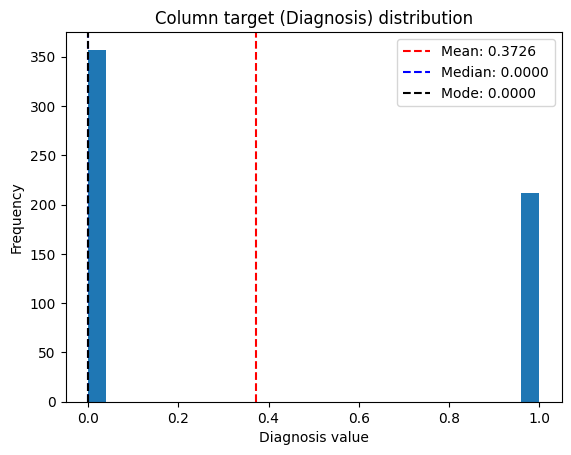

For this column ("target"/"Diagnosis"), the mean of approximately 0.37258347978910367 is significantly above the median of 0.0, with a mode of 0.
The "target" (Diagnosis) column appears to contain a Bernoulli distribution as the distribution is available for only two possible values: "0" or "1", which are categorical integers.
But, with only two possible target values, skewness is not a relevant metric for this distribution.
According to this source (https://datasciencedojo.com/blog/types-of-statistical-distributions-in-ml/), a Bernoulli distribution describes a feature with only two possible values,
as is the case with the target value of the BCWD dataset.


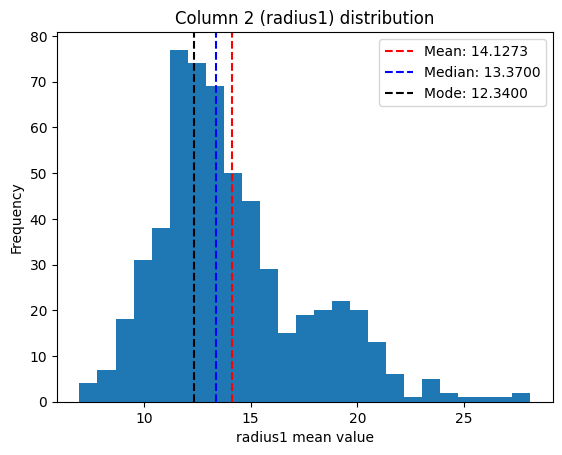

For this column ("2"/"radius1"), the mean of approximately 14.127291739894552 is moderately above the median of 13.37, with a mode of 12.34.
The skew of 0.6446775659818675 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "2" (radius1) column appears to contain a bimodal, moderately asymmetric and moderately positive skewed distribution as the right tail moderately stretches further outward than the left tail. Meanwhile, two modes are present, one just below the actual mode, another just below the radius of 20.
The culmination of these details indicates, to me, evidence of this bimodal, asymmetric distribution having a slight positive skew (towards the right).


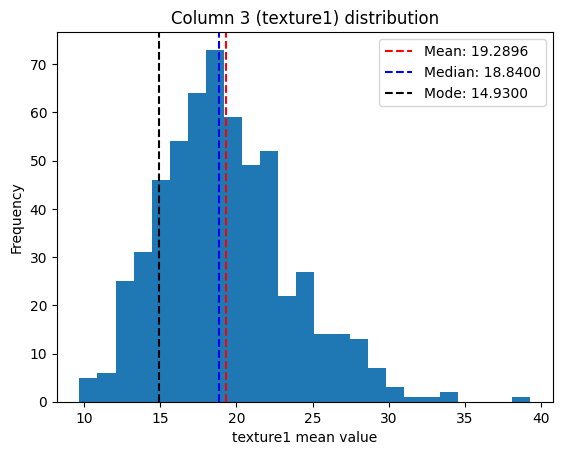

For this column ("3"/"texture1"), the mean of approximately 19.289648506151142 is slightly above the median of 18.84, with a mode of 14.93.
The skew of 0.3136327134122698 indicates a slightly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "3" (texture1) column appears to contain a unimodal, slightly asymmetric and slightly positive skewed distribution as the right tail stretches further outward than the left tail, with a regional mode situated near the median, just below the mode.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a slight positive skew (towards the right).


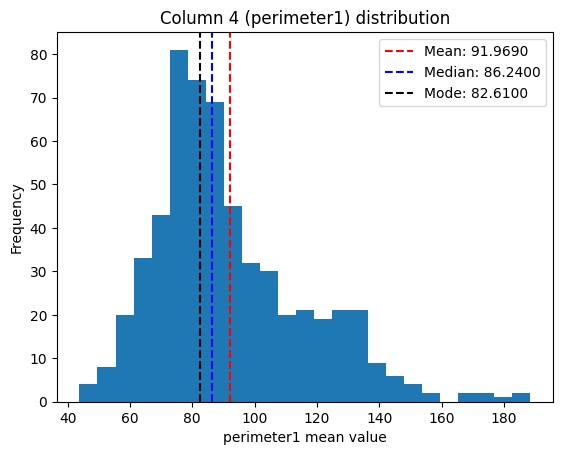

For this column ("4"/"perimeter1"), the mean of approximately 91.96903339191564 is moderately above the median of 86.24, with a mode of 82.61.
The skew of 0.7073177327203521 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "4" (perimeter1) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode just below the 80 mark.
The culmination of these details indicates, to me, evidence of this unimodal, symmetric distribution having a moderate positive skew (towards the right).


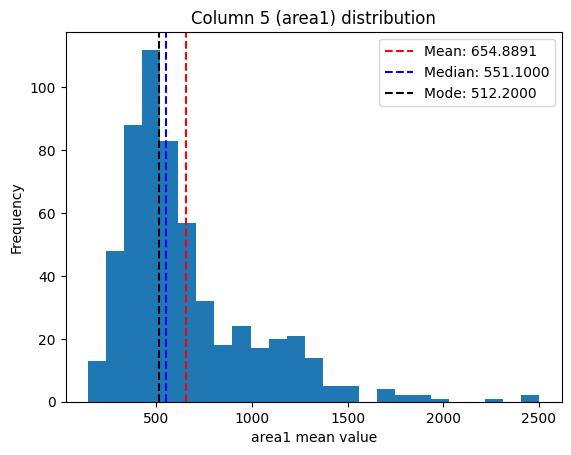

For this column ("5"/"area1"), the mean of approximately 654.8891036906855 is moderately above the median of 551.1, with a mode of 512.2.
The skew of 0.8847820682736302 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "5" (area1) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with the mode just below the actual mode.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right). Though there may be additional modes surrounding the 1000 mark, their modality appears weak, at best.


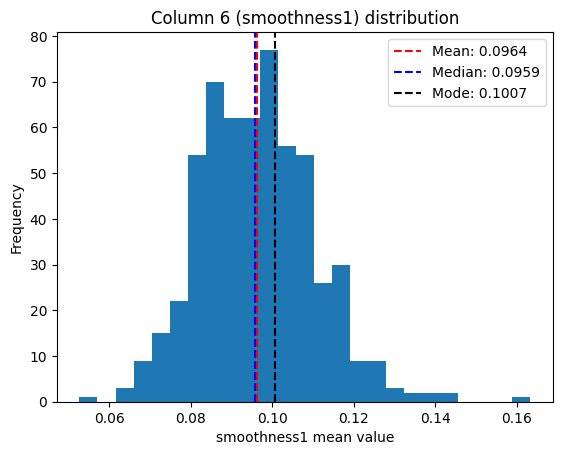

For this column ("6"/"smoothness1"), the mean of approximately 0.09636028119507907 is slightly above the median of 0.09587, with a mode of 0.1007.
The skew of 0.10458121334213859 indicates a slightly positive skew.
The "6" (smoothness1) column appears to contain a unimodal, very slightly asymmetric and very slightly positive skewed distribution though the right tail somewhat stretches further outward than the left tail, with a mode just below the actual mode and above the mean and median.
Though the mode is actually larger than either the mean or the median, the culmination of these details indicates, to me, evidence that this unimodal, distribution has a very slight positive skew (towards the right).
Though this distribution may also appear normal, the skewness of over 0 disqualifies this distribution from being considered normal.
At the same time, while additional modes may appear at the 0.085 and below the 0.12 mark, they do not appear significant enough to reconsider this as a mult

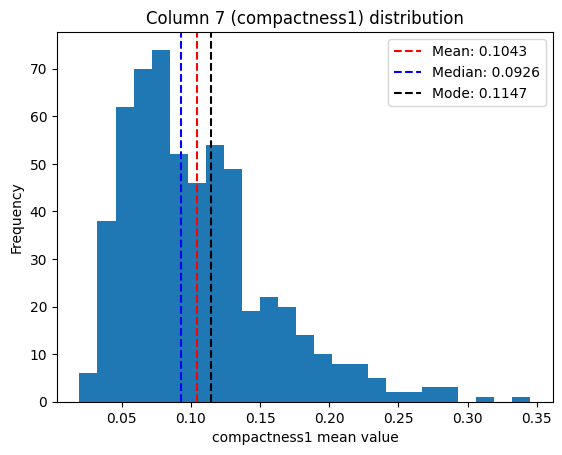

For this column ("7"/"compactness1"), the mean of approximately 0.10434098418277679 is moderately above the median of 0.0926299999999999, with a mode of 0.1147.
The skew of 0.6652360892272654 indicates a moderately positive skew.
The "7" (compactness1) column appears to contain a multimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail.
This distribution is also multimodal, with a mode located around the 0.075 point, a mode at the actual mode of 0.11, and a possible mode above the 0.16 mark. The culmination of these details indicates, to me, evidence of this multimodal, asymmetric distribution having a moderate positive skew (towards the right).


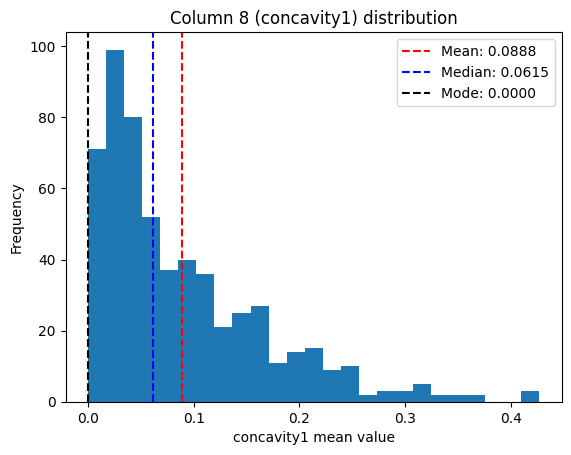

For this column ("8"/"concavity1"), the mean of approximately 0.08879931581722318 is significantly above the median of 0.06154, with a mode of 0.0.
The skew of 1.0258171560761946 indicates a significantly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "8" (concavity1) column appears to contain a unimodal, significantly asymmetric and significantly positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode between the mode and median.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a significant positive skew (towards the right).


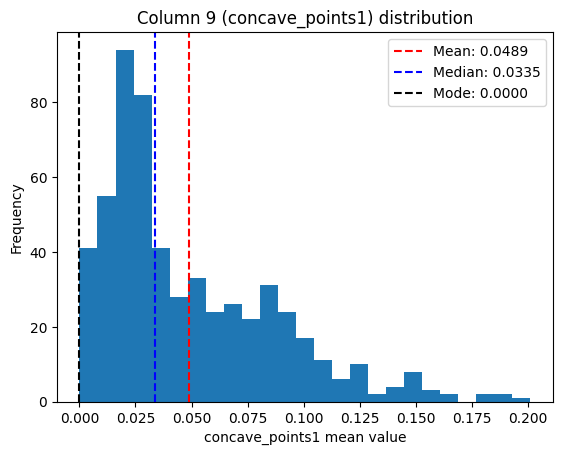

For this column ("9"/"concave_points1"), the mean of approximately 0.04891914586994726 is significantly above the median of 0.0335, with a mode of 0.0.
The skew of 1.192114593085811 indicates a significantly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "9" (concave_points1) column appears to contain a unimodal, significantly asymmetric and significantly positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode just below the 0.025 mark.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a significant positive skew (towards the right).


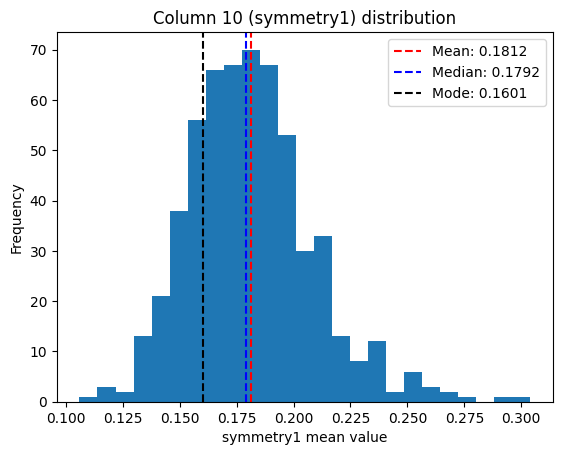

For this column ("10"/"symmetry1"), the mean of approximately 0.18116186291739894 is slightly above the median of 0.1792, with a mode of 0.1601.
The skew of 0.2146906088856796 indicates a slightly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "10" (symmetry1) column appears to contain a unimodal, slightly asymmetric and slightly positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode located around the mean and median.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a slight positive skew (towards the right).
Though this distribution may appear almost normal, the skewness of 0 is indicative of a positive skew, albeit slight.


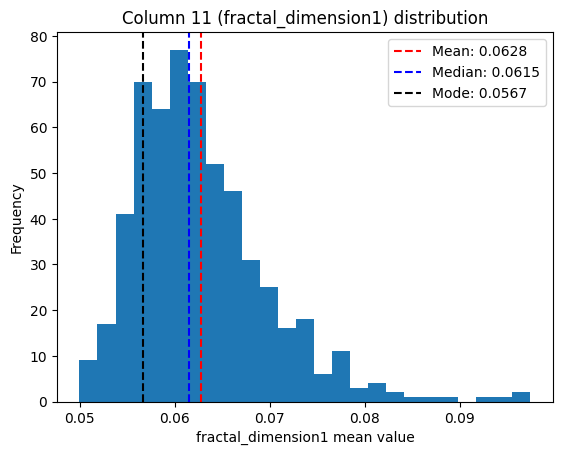

For this column ("11"/"fractal_dimension1"), the mean of approximately 0.06279760984182775 is moderately above the median of 0.06154, with a mode of 0.05667.
The skew of 0.5343676571563665 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "11" (fractal_dimension1) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, while the regional mode is located around the 0.06 mark.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


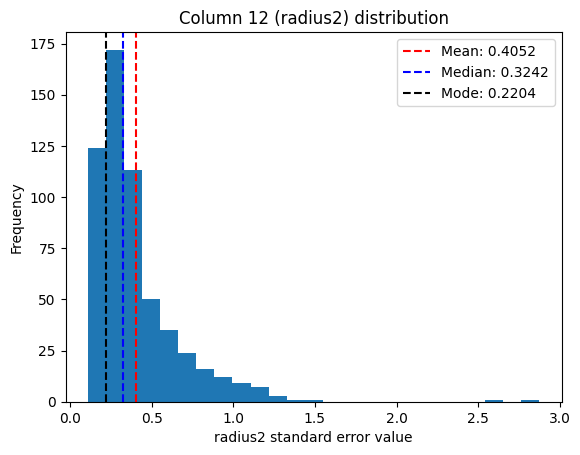

For this column ("12"/"radius2"), the mean of approximately 0.40517205623901575 is moderately above the median of 0.3242, with a mode of 0.2204.
The skew of 0.8759647135612044 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "12" (radius2) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, in this case there is no left tail at all, while the mode is located between the actual mode and the median.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


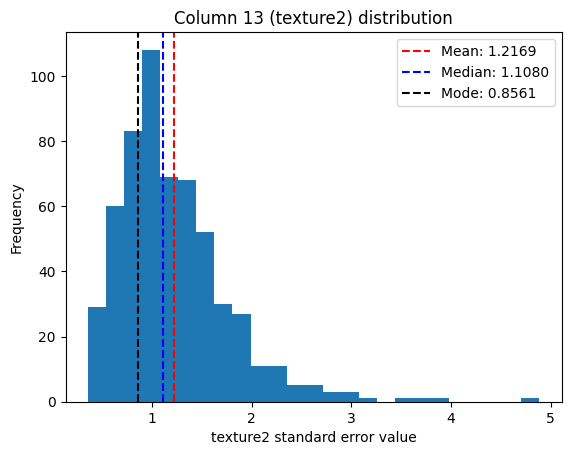

For this column ("13"/"texture2"), the mean of approximately 1.2168534270650264 is moderately above the median of 1.108, with a mode of 0.8561.
The skew of 0.5919717805136149 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "13" (texture2) column appears to contain a unimodal, significantly asymmetric and significantly positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode situated between the mode and median.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a significant positive skew (towards the right).


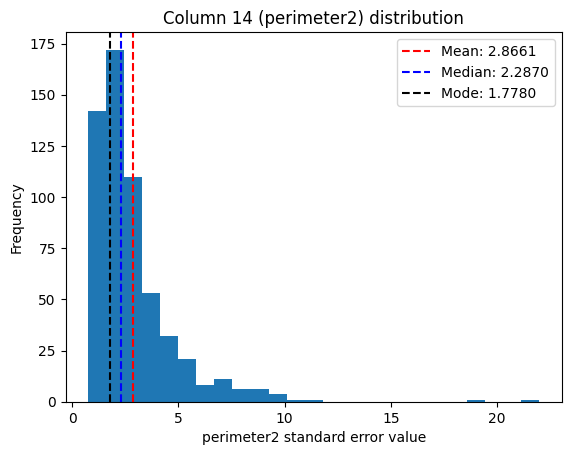

For this column ("14"/"perimeter2"), the mean of approximately 2.866059226713533 is moderately above the median of 2.287, with a mode of 1.778.
The skew of 0.8592001223172164 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "14" (perimeter2) column appears to contain a unimodal, significantly asymmetric and significantly positive skewed distribution as the right tail stretches further outward than the left tail, with a regional mode around the median and actual mode.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a significant positive skew (towards the right).


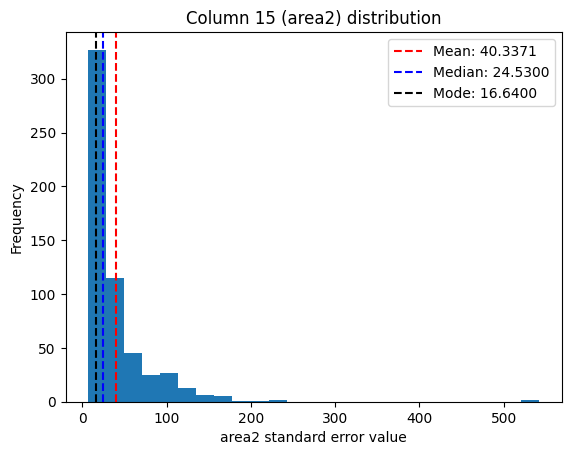

For this column ("15"/"area2"), the mean of approximately 40.337079086116 is significantly above the median of 24.53, with a mode of 16.64.
The skew of 1.0424310634666385 indicates a significantly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "15" (area2) column appears to contain a unimodal, significantly asymmetric and significantly positive skewed distribution as the right tail stretches further outward than the left tail, in this case there is no left tail at all, while the mode is located around the mode and median.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a significant positive skew (towards the right).


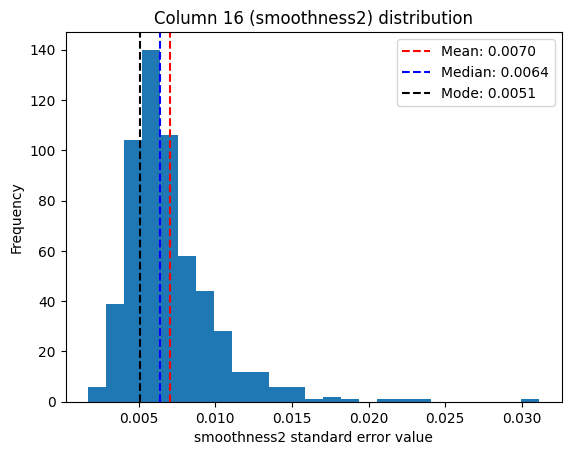

For this column ("16"/"smoothness2"), the mean of approximately 0.007040978910369058 is moderately above the median of 0.0063799999999999, with a mode of 0.0050799999999999.
The skew of 0.6604246063462522 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "16" (smoothness2) column appears to contain a unimodal, significantly asymmetric and significantly positive skewed distribution as the right tail stretches further outward than the left tail, with a regional mode just above the mode.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a significant positive skew (towards the right).


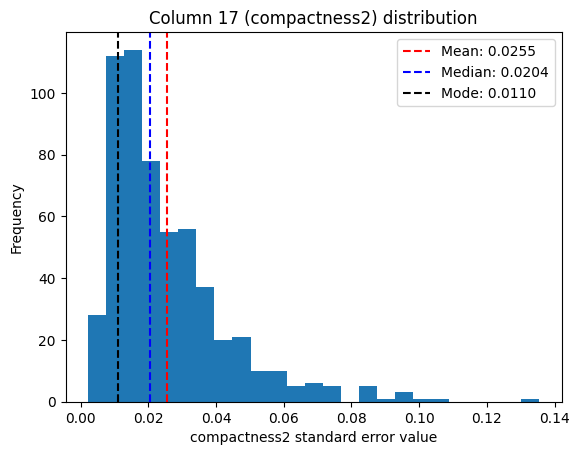

For this column ("17"/"compactness2"), the mean of approximately 0.025478138840070285 is moderately above the median of 0.02045, with a mode of 0.01104.
The skew of 0.8423199391678124 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "17" (compactness2) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with a regional mode just below the 0.02 mark between the mode and median.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


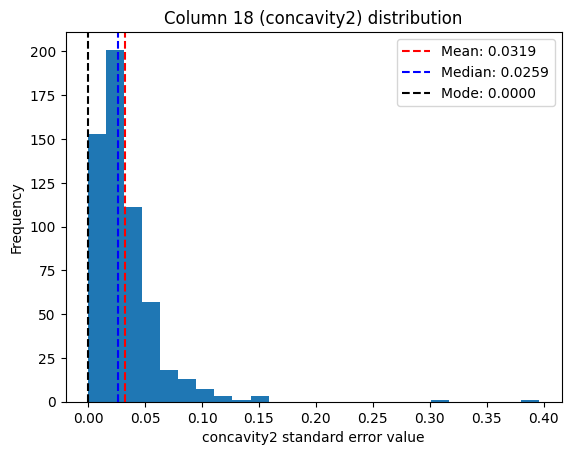

For this column ("18"/"concavity2"), the mean of approximately 0.03189371634446395 is moderately above the median of 0.0258899999999999, with a mode of 0.0.
The skew of 0.5966710740213966 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "18" (concavity2) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with a regional mode around the median, just below the mean.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


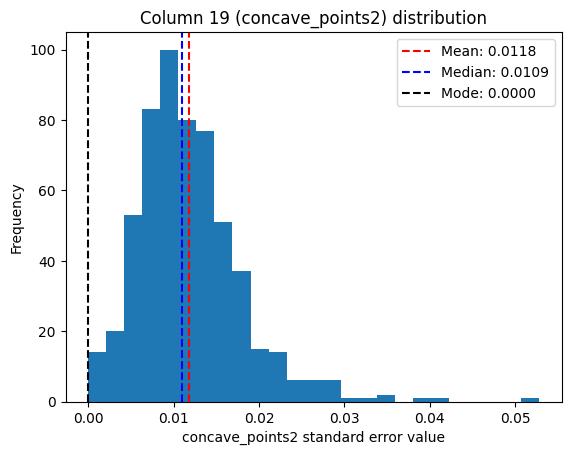

For this column ("19"/"concave_points2"), the mean of approximately 0.011796137082601042 is slightly above the median of 0.01093, with a mode of 0.0.
The skew of 0.42111688106935913 indicates a slightly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "19" (concave_points2) column appears to contain a unimodal, slightly asymmetric and slightly positive skewed distribution as the right tail stretches further outward than the left tail, with a regional mode just below the 0.01 mark.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a slightly positive skew (towards the right).


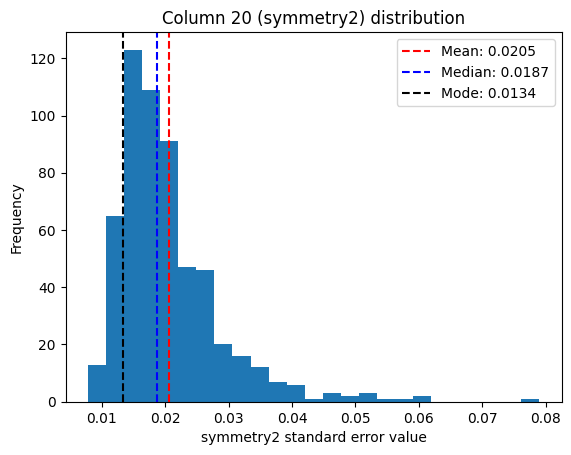

For this column ("20"/"symmetry2"), the mean of approximately 0.020542298769771518 is moderately above the median of 0.01873, with a mode of 0.01344.
The skew of 0.6577125514348692 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "20" (symmetry2) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with a regional mode just above the actual mode.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


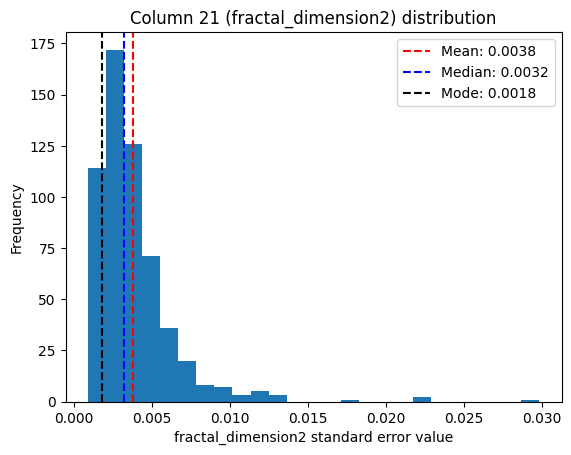

For this column ("21"/"fractal_dimension2"), the mean of approximately 0.003794903866432324 is moderately above the median of 0.003187, with a mode of 0.001784.
The skew of 0.6892149235525383 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "21" (fractal_dimension2) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode between the median and mode.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


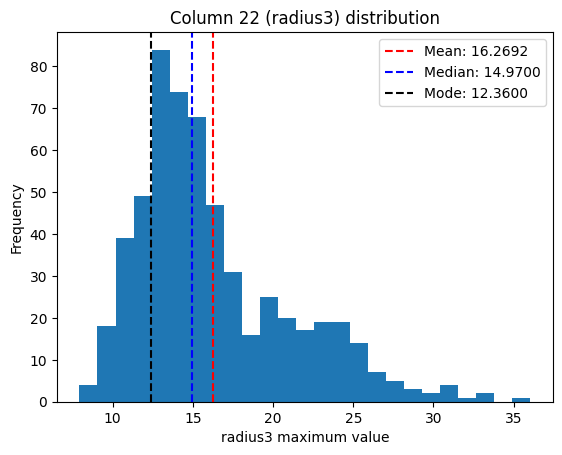

For this column ("22"/"radius3"), the mean of approximately 16.269189806678387 is moderately above the median of 14.97, with a mode of 12.36.
The skew of 0.8064089814556078 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "22" (radius3) column appears to contain a bimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode just above the actual mode.
This distribution is bimodal, with a mode located where the actual mode is located and a mode near the 20 mark. The culmination of these details indicates, to me, evidence of this bimodal, asymmetric distribution having a moderate positive skew (towards the right).


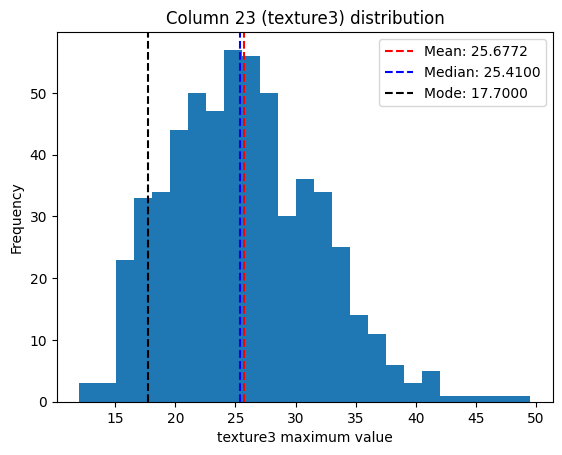

For this column ("23"/"texture3"), the mean of approximately 25.677223198594024 is slightly above the median of 25.41, with a mode of 17.7.
The skew of 0.1304321499276463 indicates a slightly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "23" (texture3) column appears to contain a slightly bimodal, slightly asymmetric and slightly positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode just below the mean and median.
This distribution is slightly bimodal, with a mode located near the mean and median and another mode near the 30 mark that is just significant enough to warrant such a designation.
The culmination of these details indicates, to me, evidence of this bimodal, asymmetric distribution having a moderate positive skew (towards the right).


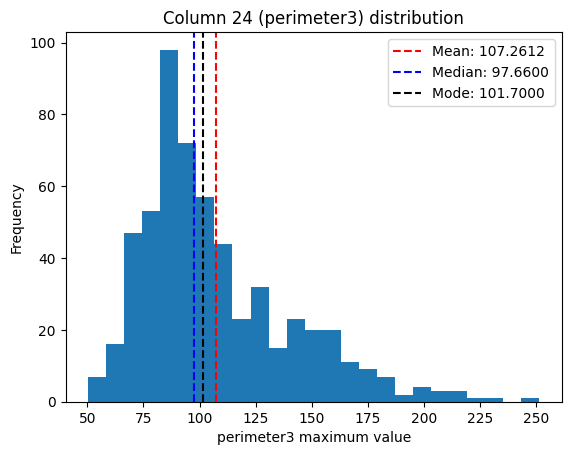

For this column ("24"/"perimeter3"), the mean of approximately 107.26121265377857 is moderately above the median of 97.66, with a mode of 101.7.
The skew of 0.8571862727147682 indicates a moderately positive skew.
The "24" (perimeter3) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode around the 80-85 mark.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


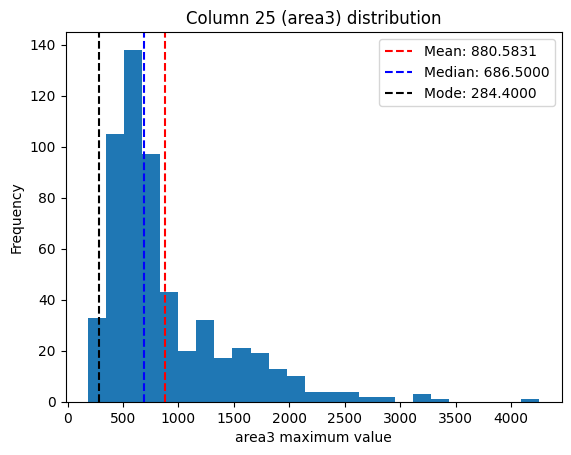

For this column ("25"/"area3"), the mean of approximately 880.5831282952548 is significantly above the median of 686.5, with a mode of 284.4.
The skew of 1.0226437760171483 indicates a significantly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "25" (area3) column appears to contain a unimodal, significantly asymmetric and significantly positive skewed distribution as the right tail stretches further outward than the left tail, with the regional mode just below the median.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a significant positive skew (towards the right).


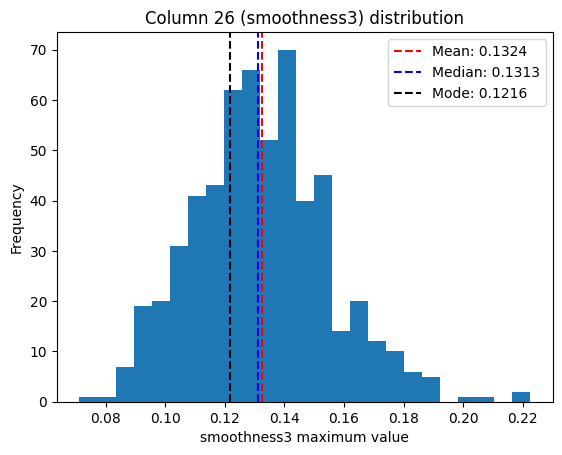

For this column ("26"/"smoothness3"), the mean of approximately 0.13236859402460457 is slightly above the median of 0.1313, with a mode of 0.1216.
The skew of 0.14040477327107387 indicates a slightly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "26" (smoothness3) column appears to contain a unimodal, slightly asymmetric and slightly positive skewed distribution as the right tail stretches further outward than the left tail, with an actual mode just above the 0.14 mark.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a slight positive skew (towards the right).
Though this distribution appears to have a close to normal distribution, the skewness of above 0 indicates that there is a positive skew.
The distribution may also appear to have modes just above the 0.14 and 0.16 marks, but appear to, overall, fit with the other values as having the shape of a

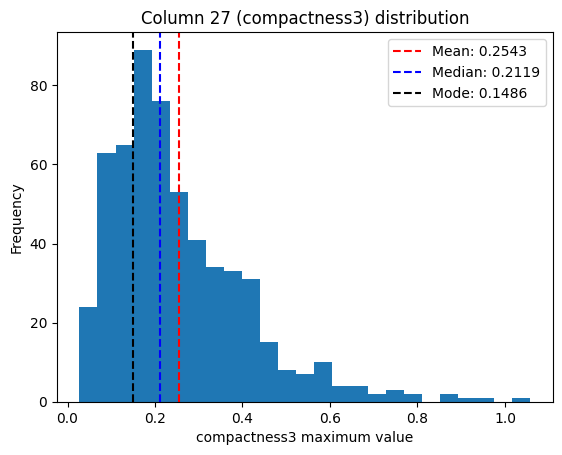

For this column ("27"/"compactness3"), the mean of approximately 0.25426504393673116 is moderately above the median of 0.2119, with a mode of 0.1486.
The skew of 0.807791839564133 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "27" (compactness3) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with a regional mode just above the actual mode.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


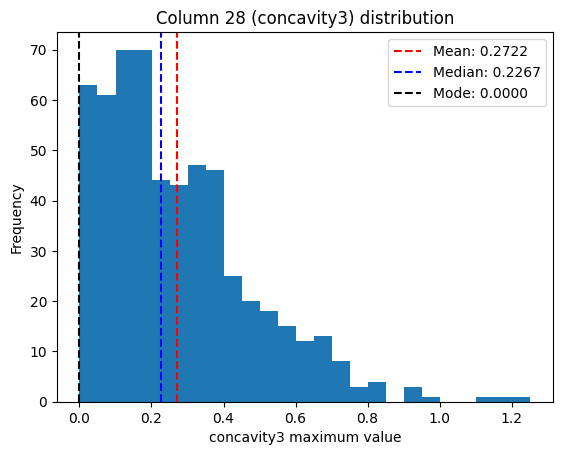

For this column ("28"/"concavity3"), the mean of approximately 0.27218848330404216 is moderately above the median of 0.2267, with a mode of 0.0.
The skew of 0.6541206494006093 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "28" (concavity3) column appears to contain a bimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, with one mode below the 0.2 mark and a slight mode above the 0.3 mark.
The culmination of these details indicates, to me, evidence of this bimodal, asymmetric distribution having a moderate positive skew (towards the right).


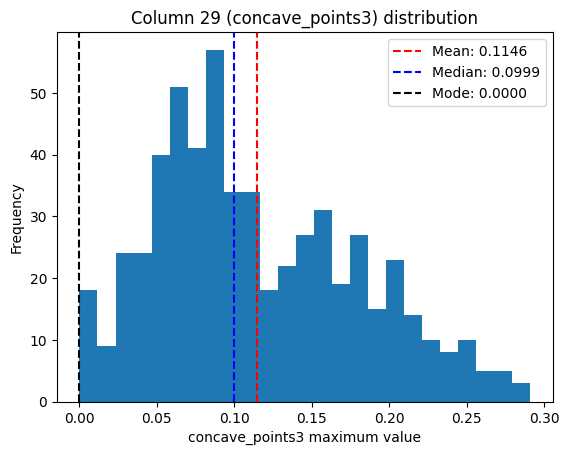

For this column ("29"/"concave_points3"), the mean of approximately 0.11460622319859401 is moderately above the median of 0.0999299999999999, with a mode of 0.0.
The skew of 0.6698174565932001 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "29" (concave_points3) column appears to contain a bimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail, There is one mode around the 0.9 mark and another mode around the 0.15 mark..
The culmination of these details indicates, to me, evidence of this bimodal, asymmetric distribution having a moderate positive skew (towards the right).


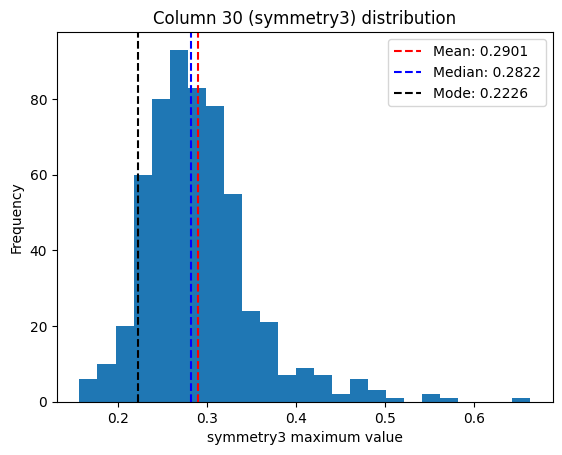

For this column ("30"/"symmetry3"), the mean of approximately 0.2900755711775044 is slightly above the median of 0.2822, with a mode of 0.2226.
The skew of 0.3818923656150142 indicates a slightly positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "30" (symmetry3) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail with a regional mode just below the mean and median.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


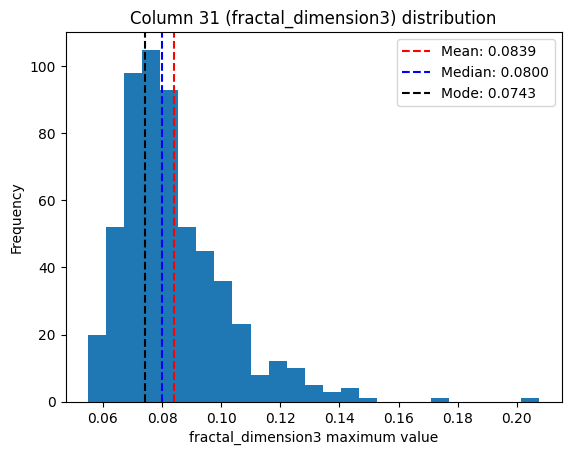

For this column ("31"/"fractal_dimension3"), the mean of approximately 0.08394581722319859 is moderately above the median of 0.08004, with a mode of 0.07427.
The skew of 0.6487613212986025 indicates a moderately positive skew, which can be confirmed as the mean is greater than the median, and the median is greater than the mode.
The "31" (fractal_dimension3) column appears to contain a unimodal, moderately asymmetric and moderately positive skewed distribution as the right tail stretches further outward than the left tail with a regional mode near the actual mode.
The culmination of these details indicates, to me, evidence of this unimodal, asymmetric distribution having a moderate positive skew (towards the right).


In [ ]:
# YOUR CODE HERE

# Identify the feature name based on the given name
def feature_type(name):
    if name in p2_names[1:11]:
        return " mean"
    elif name in p2_names[11:21]:
        return " standard error"
    elif name in p2_names[21:]:
        return " maximum"
    else:
        return ""

# Identify the skewness based on the given skewness value
def hist_skewness(hist_skew):
    if hist_skew > 1 or hist_skew < -1:
        return "significantly"
    elif hist_skew > 0.5 or hist_skew < -0.5:
        return "moderately"
    else:
        return "slightly"

# Identify the validity of a stated skew based on a comparison of the mean, median and mode
    # which correlate with a specific type of skewness
def mmm_order(mean, median, mode):
    if(mean > median > mode):   # Right skew
        return ", which can be confirmed as the mean is greater than the median, and the median is greater than the mode"
    elif(mean < median < mode): # Left skew
        return ", which can be confirmed as the mean is lesser than the median, which is lesser than the mode"
    else:
        return ""

# Loop through each feature, then plot its histogram distribution
for name in p2_names:
    # Skewness for a column is calculated using the difference between the mean and median, divided by the standard deviation:
    hist_skew = (3*(breast_cancer_wisconsin_diagnostic[name].mean() - breast_cancer_wisconsin_diagnostic[name].median())) / breast_cancer_wisconsin_diagnostic[name].std(ddof=1)

    # Summary statistics for the mean, median and mode:
    hist_mean = breast_cancer_wisconsin_diagnostic[name].mean()
    hist_median = breast_cancer_wisconsin_diagnostic[name].median()
    hist_mode = breast_cancer_wisconsin_diagnostic[name].mode().iloc[0]

    # String statements denoting the level of skewness and comparing the mean and median:
    hist_mean_median_compare = "above" if hist_mean > hist_median else "below"
    hist_skew_compare = hist_skewness(hist_skew)
    hist_order = mmm_order(hist_mean, hist_median, hist_mode)

    # Plotting the actual histograms that correspond with each column:
    plt.hist(breast_cancer_wisconsin_diagnostic[name], bins=25)
    plt.axvline(x=hist_mean, color='red', linestyle='--', linewidth=1.5, label=f"Mean: {hist_mean:.4f}")
    plt.axvline(x=hist_median, color='blue', linestyle='--', linewidth=1.5, label=f"Median: {hist_median:.4f}")
    plt.axvline(x=hist_mode, color='black', linestyle='--', linewidth=1.5, label=f"Mode: {hist_mode:.4f}")
    plt.legend()
    plt.title(f'Column {name} ({bcwd_names[name]}) distribution')
    plt.ylabel("Frequency")
    plt.xlabel(f"{bcwd_names[name]}{feature_type(name)} value")
    plt.show()

    # Explanation of the mean, median, and mode for each attribute
    print(f'For this column ("{name}"/"{bcwd_names[name]}"), the mean of approximately {hist_mean} is {hist_skew_compare} {hist_mean_median_compare} the median of {hist_median}, with a mode of {hist_mode}.')

    # If the column is not the target column, output information about the skew
        # as the target column does not contain enough data for there to be a skew of any kind
    if name != 'target':
        print(f"The skew of {hist_skew} indicates a {hist_skew_compare} {"positive" if hist_mean_median_compare == "above" else "negative"} skew{hist_order}.")

    # Informaton about the type of distribution and additional details about the distribution
    print(f'The "{name}" ({bcwd_names[name]}) column appears to contain a {hist_explanations[name]["dist"]} distribution{hist_explanations[name]["explanation"]}.')
    print(hist_explanations[name]["additional"])

<p>Final notes for Problem 3 include the fact that I chose to use 25 bins for the balance of simplicity and detail.  Increasing the number of bins (to 40 for instance) tended to increase the number of modes and obsfucate my ability to discern the shape of a distribution, while less bins (at the default of 10 or below) resulted in obfuscating the details for each distribution.</p>

### Step 4: Comparing Column Pairs

<h4>The uniqueness of target classes</h4>
<p>As there are only two possible target classes, using a boxplot with the target variable as the x-axis and the feature as the y-axis allows for clear viewing of the relationship between each feature and the target variable by more easily being able to view the differences in IQR, outliers, and the median based on the feature and target combination.</p>
<p>When attempting to do the inverse, no clear relationship could be made and, at the same time, the code became extremely slow.</p>

In [ ]:
# YOUR CODE HERE

bcwd_description = {
    '2': "The mean radius feature of 'radius1' appears to have a dependent relationship " +
    "with the target 'Diagnosis' variable as the distributions for the mean radius values, " +
    "only have a slight amount of overlap. " +
    "Also, the mean, median, and mode of both distributions do not overlap.",
    '3': "The mean texture feature of 'texture1' has an independent relationship from " +
    "the target 'Diagnosis' variable as there is significant overlap between the two " +
    "distributions for the mean texture values.",
    '4': "The mean perimeter feature of 'perimeter1' has a dependent relationship " +
    "with the target 'Diagnosis' variable as the distributions for the mean perimeter " +
    "values only have a slight amount of overlap. " +
    "Also, the mean, median and mode of each distributions are relatively far from that " +
    "of the other.",
    '5': "The mean area feature of 'area1' has a likely dependent relationship " +
    "with the target 'Diagnosis' variable as there is only some overlap between the two distributions " +
    "for the mean area values.",
    '6': "The mean smoothness feature of 'smoothness1' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the mean smoothness values.",
    '7': "The mean compactness feature of 'compactness1' has a likely independent relationship " +
    "with the target 'Diagnosis' variable as there is large overlap between the two distributions " +
    "for the mean compactness values, while the mode for mean compactness colored with " +
    "target 0 is close to the mean, median and mode value for target 1.",
    '8': "The mean concavity feature of 'concavity1' has a likely dependent relationship " +
    "with the target 'Diagnosis' variable as there is only some overlap between the two distributions " +
    "for the mean concavity values, while the mean, median and modes for both distributions " +
    "are far from each other.",
    '9': "The mean concave points feature of 'concave_points1' has a dependent relationship " +
    "with the target 'Diagnosis' variable as there is limited overlap between the two distributions " +
    "for the mean concave points value, while the mean, median, and modes for both distributions " +
    "are far from each other.",
    '10': "The mean symmetry feature of 'symmetry1' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "and the regional modes for the mean symmetry values.",
    '11': "The mean fractal dimension feature of 'fractal_dimension1' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "and the regional modes for the mean fractal dimension values, while the mean and median " +
    "for the two distributions are very close to each other.",
    '12': "The radius standard error feature of 'radius2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of radius, while the mean and median for the target 0 distribution is very close " +
    "to the mode of the target 1 distribution.",
    '13': "The texture standard error feature of 'texture2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of texture, while the mean, median, and mode for both distributions " +
    "are relatively close to each other.",
    '14': "The perimeter standard error feature of 'perimeter2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of perimeter, while the mean, median and mode for the target 0 distribution " +
    "are close to the mode of the target 1 distribution.",
    '15': "The area standard error feature of 'area2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of area.",
    '16': "The smoothness standard error feature of 'smoothness2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of smoothness, and the mean, median and mode values for both " +
    "distributions appear to be very close to each other.",
    '17': "The compactness standard error feature of 'compactness2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of compactness, while the regional modes for both distributions " +
    "also overlap.",
    '18': "The concavity standard error feature of 'concavity2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of concavity, while the regional mode for both distributions " +
    "also overlap.",
    '19': "The concave points standard error feature of 'concave_points2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of concave points.",
    '20': "The symmetry standard error feature of 'symmetry2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of symmetry, while the mean, median and mode for both distributions " +
    "are very close to each other and both distributions have overlapping regional modes.",
    '21': "The fractal dimension standard error feature of 'fractal_dimension2' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the standard error of fractal dimension, wheremin the regional modes overlap " +
    "and the mean, median, and mode for both distributions are very close to each other.",
    '22': "The maximum radius feature of 'radius3' has a dependent relationship " +
    "with the target 'Diagnosis' variable as there is only slight overlap between the two distributions " +
    "for the maximum radius, while the mean, median and mode for the two distributions are " +
    "very far from each other.",
    '23': "The maximum texture feature of 'texture3' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the maximum texture.",
    '24': "The maximum perimeter feature of 'perimeter3' has a dependent relationship " +
    "with the target 'Diagnosis' variable as there is only some overlap between the two distributions " +
    "for the maximum perimeter and their regional modes do not overlap.",
    '25': "The maximum area feature of 'area3' has a dependent relationship " +
    "with the target 'Diagnosis' variable as there is only some overlap between the two distributions " +
    "for the maximum area, while the modes for each distribution do not overlap.",
    '26': "The maximum smoothness feature of 'smoothness3' has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions " +
    "for the maximum smoothness value.",
    '27': "The maximum compactness feature of 'compactness3' has a likely dependent relationship " +
    "with the target 'Diagnosis' variable as there is some overlap between the two distributions " +
    "for the maximum compactness value, though their regional modes do not overlap.",
    '28': "The maximum concavity feature of 'concavity3' has a dependent relationship with the target 'Diagnosis' variable as there is some overlap between the two distributions for the maximum concavity value.",
    '29': "The maximum concave points feature of ‘concave_points3’ has a dependent relationship " +
    "with the target 'Diagnosis' variable as there is only some overlap between the two distributions for the maximum concave points value, while there is a clear distinction between their regional modes.",
    '30': "The maximum symmetry feature of ‘symmetry3’ has an independent relationship " +
    "with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the maximum symmetry and their regional modes also overlap.",
    '31': "The maximum fractal dimension feature of ‘fractal_dimension3 has an independent relationship with the target 'Diagnosis' variable as there is considerable overlap between the two distributions for the maximum fractal dimension value and their regional modes also overlap.",
}

# print(p2_names)

<p>Though I originally wanted to use box plots to fulfill the plotting requirements, I decided to pivot and group each column by the target value of 0 or 1, then plot a histogram accordingly for each column.</p>
<p>The following code instantiates this process:</p>

For the following distributions, each column is colored in by each value of the target 'Diagnosis' variable, which can be either 0 or 1 to denote a benign or malignant case of breast cancer cells for each observation.


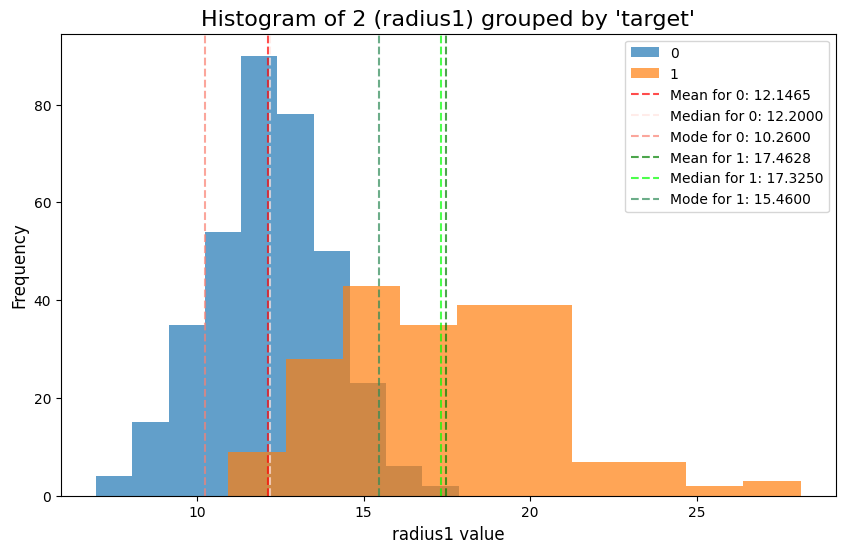

The mean radius feature of 'radius1' appears to have a dependent relationship with the target 'Diagnosis' variable as the distributions for the mean radius values, only have a slight amount of overlap. Also, the mean, median, and mode of both distributions do not overlap.


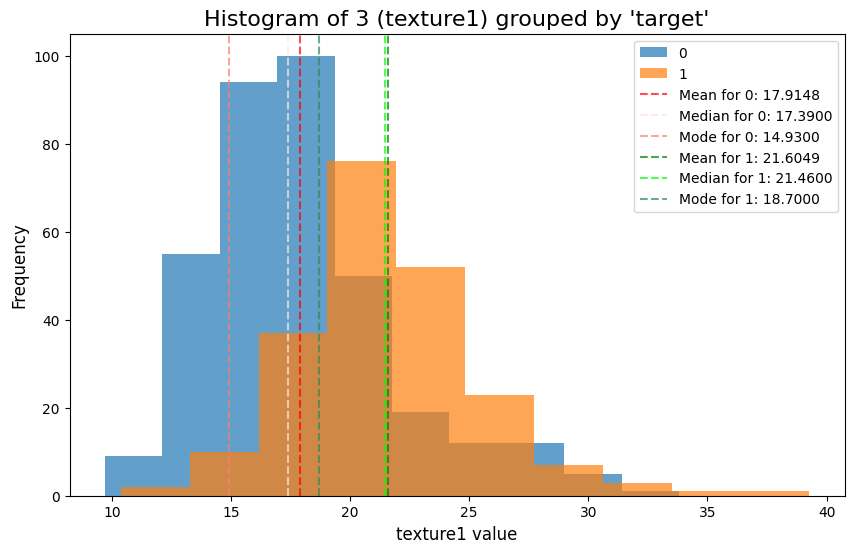

The mean texture feature of 'texture1' has an independent relationship from the target 'Diagnosis' variable as there is significant overlap between the two distributions for the mean texture values.


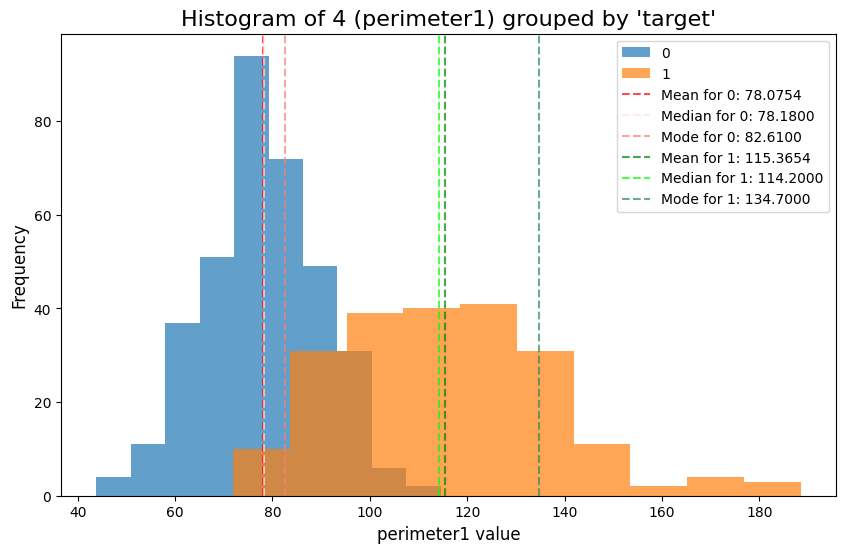

The mean perimeter feature of 'perimeter1' has a dependent relationship with the target 'Diagnosis' variable as the distributions for the mean perimeter values only have a slight amount of overlap. Also, the mean, median and mode of each distributions are relatively far from that of the other.


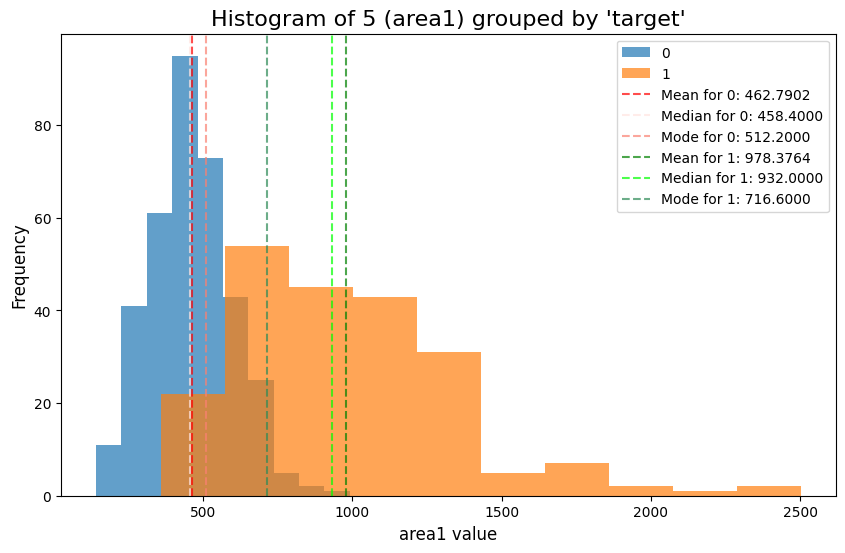

The mean area feature of 'area1' has a likely dependent relationship with the target 'Diagnosis' variable as there is only some overlap between the two distributions for the mean area values.


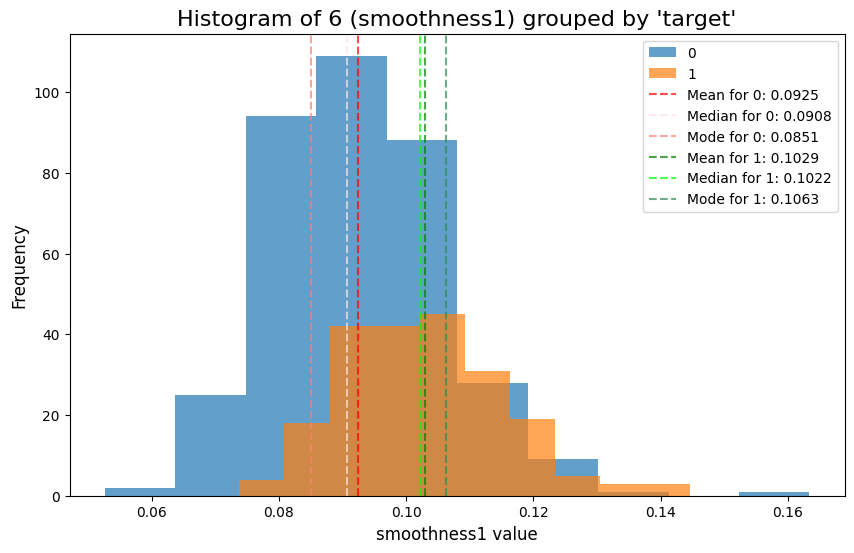

The mean smoothness feature of 'smoothness1' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the mean smoothness values.


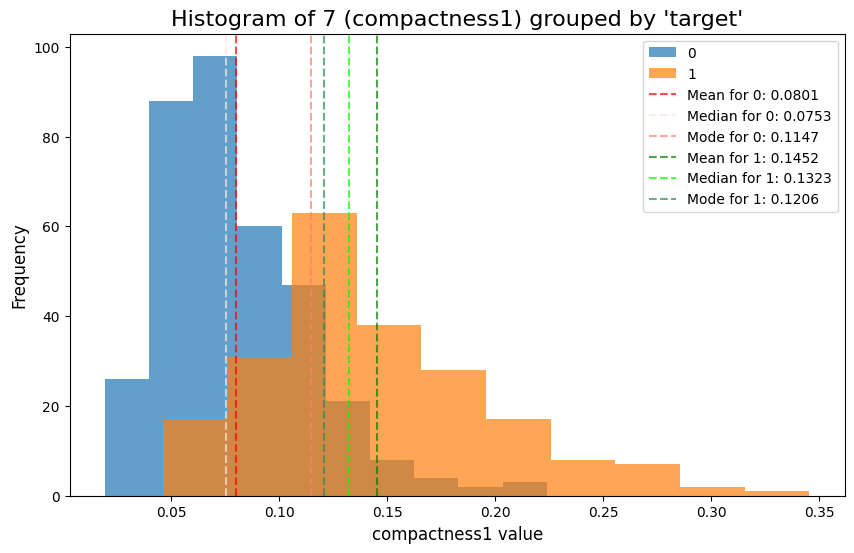

The mean compactness feature of 'compactness1' has a likely independent relationship with the target 'Diagnosis' variable as there is large overlap between the two distributions for the mean compactness values, while the mode for mean compactness colored with target 0 is close to the mean, median and mode value for target 1.


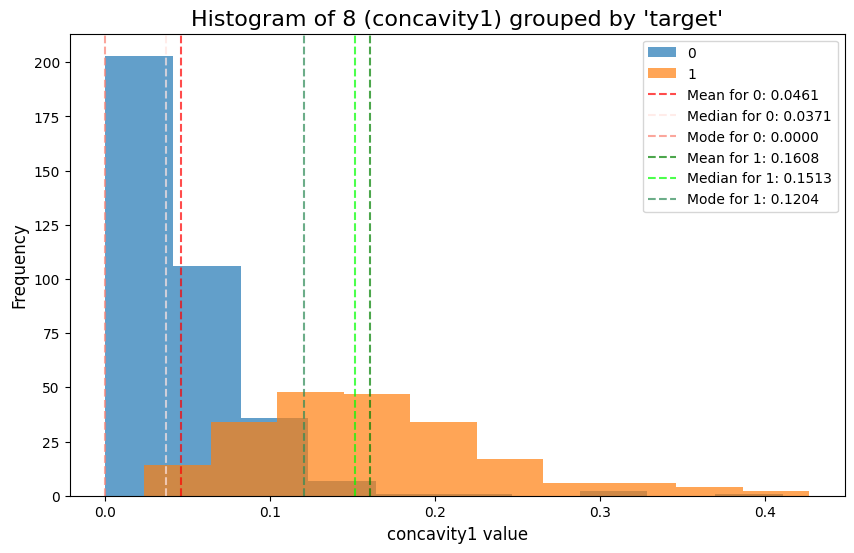

The mean concavity feature of 'concavity1' has a likely dependent relationship with the target 'Diagnosis' variable as there is only some overlap between the two distributions for the mean concavity values, while the mean, median and modes for both distributions are far from each other.


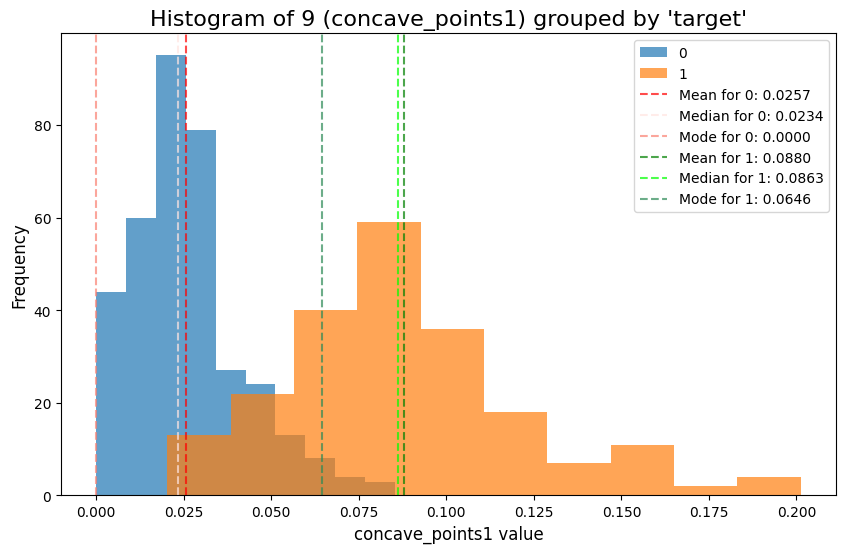

The mean concave points feature of 'concave_points1' has a dependent relationship with the target 'Diagnosis' variable as there is limited overlap between the two distributions for the mean concave points value, while the mean, median, and modes for both distributions are far from each other.


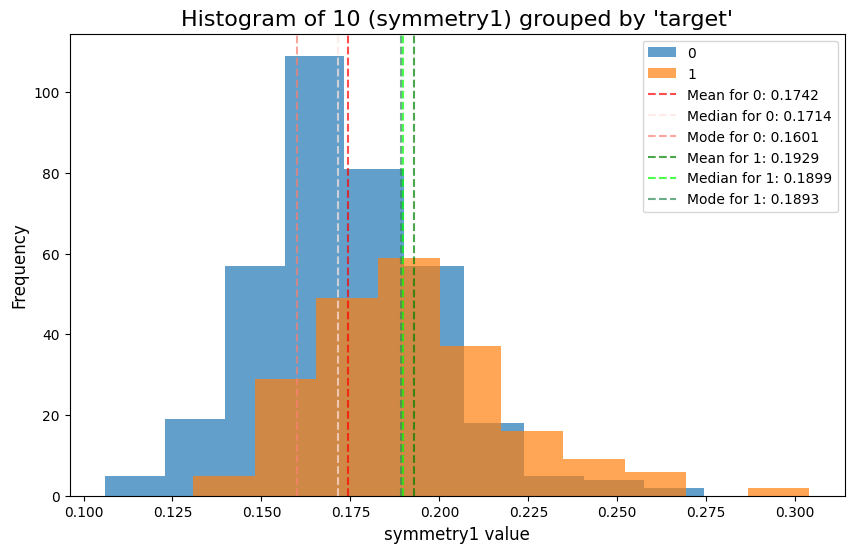

The mean symmetry feature of 'symmetry1' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions and the regional modes for the mean symmetry values.


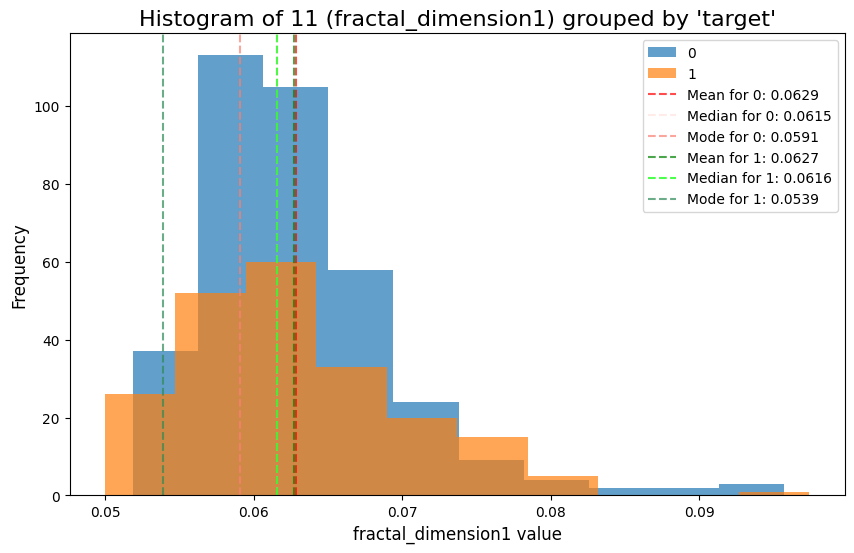

The mean fractal dimension feature of 'fractal_dimension1' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions and the regional modes for the mean fractal dimension values, while the mean and median for the two distributions are very close to each other.


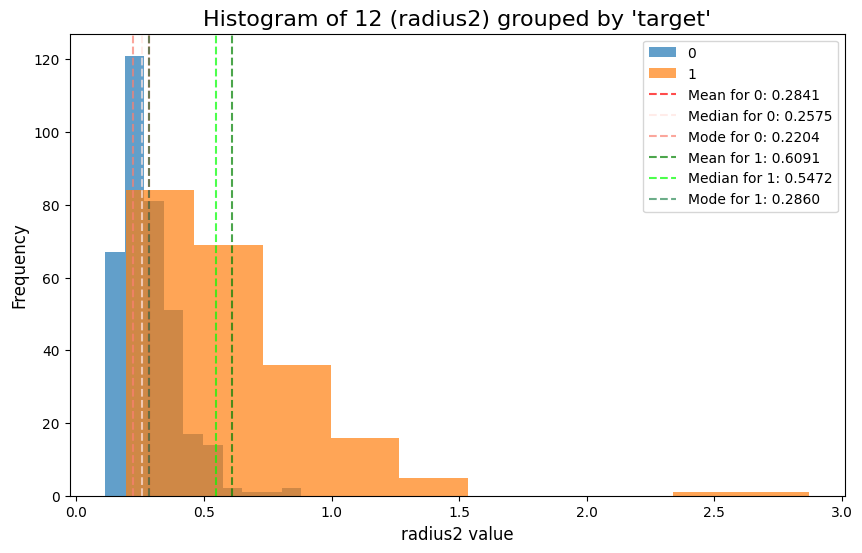

The radius standard error feature of 'radius2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of radius, while the mean and median for the target 0 distribution is very close to the mode of the target 1 distribution.


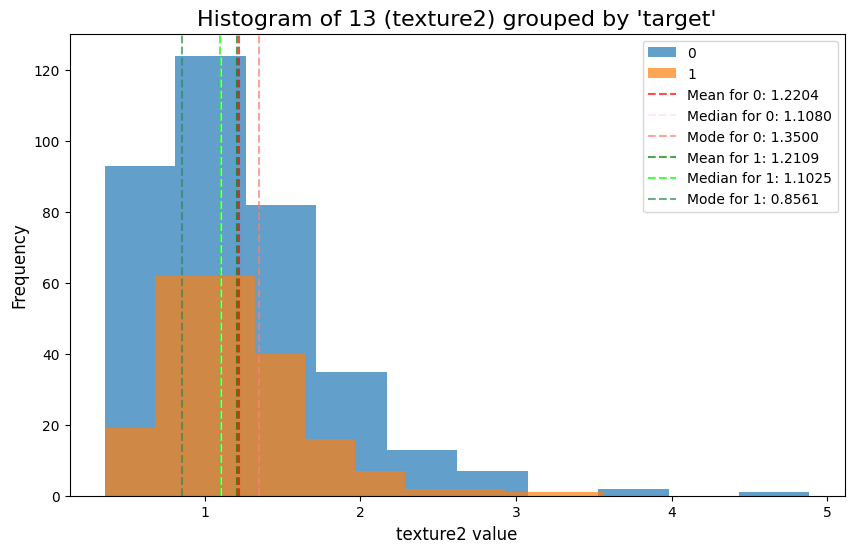

The texture standard error feature of 'texture2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of texture, while the mean, median, and mode for both distributions are relatively close to each other.


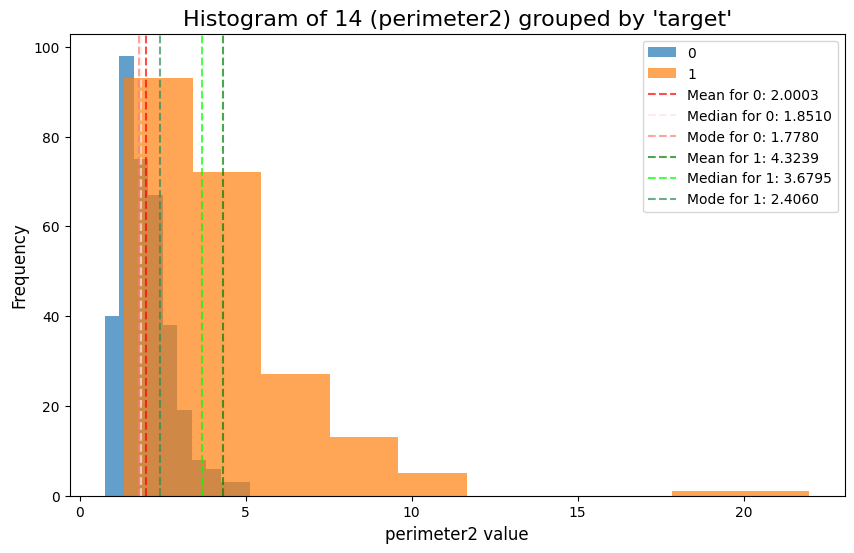

The perimeter standard error feature of 'perimeter2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of perimeter, while the mean, median and mode for the target 0 distribution are close to the mode of the target 1 distribution.


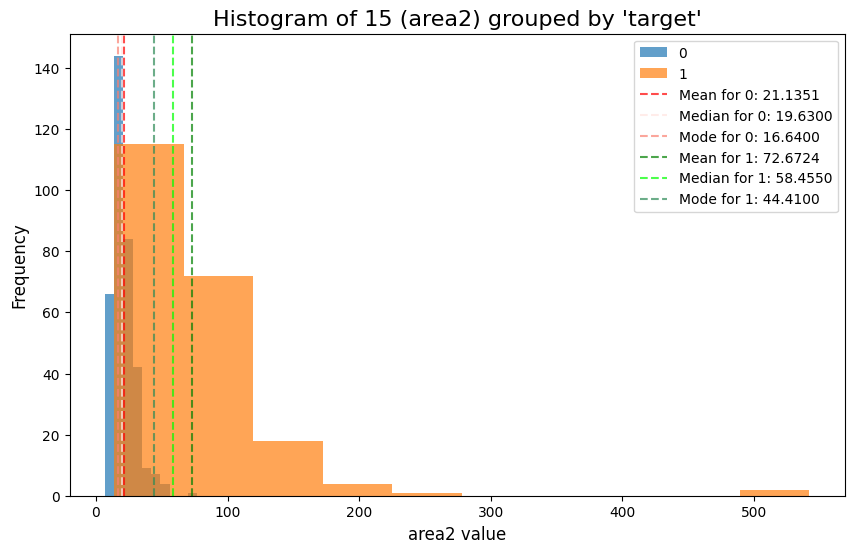

The area standard error feature of 'area2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of area.


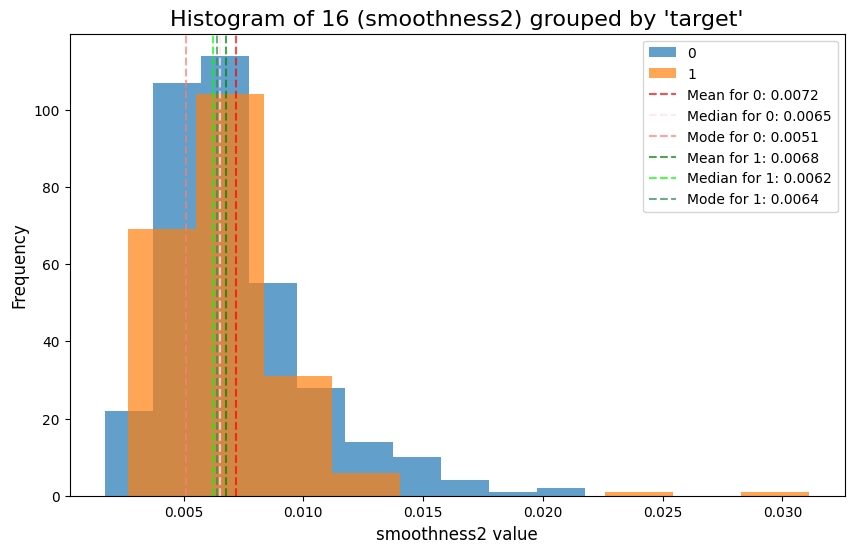

The smoothness standard error feature of 'smoothness2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of smoothness, and the mean, median and mode values for both distributions appear to be very close to each other.


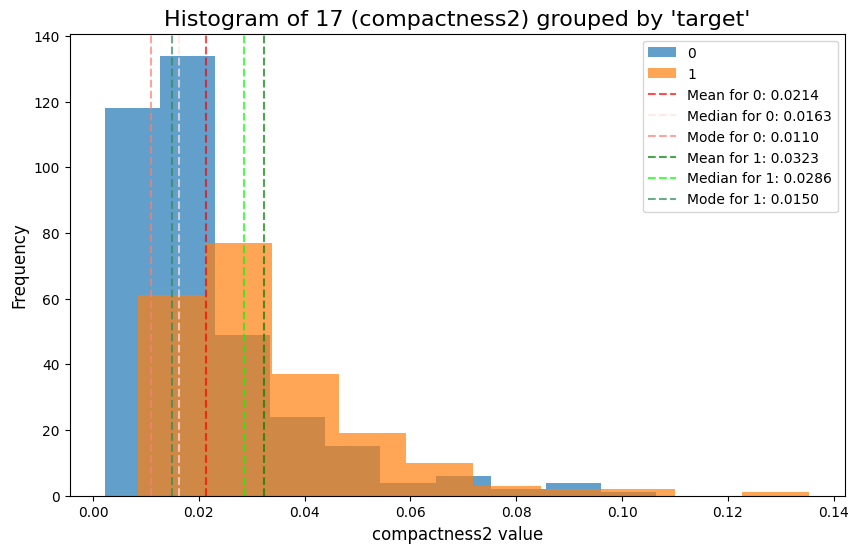

The compactness standard error feature of 'compactness2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of compactness, while the regional modes for both distributions also overlap.


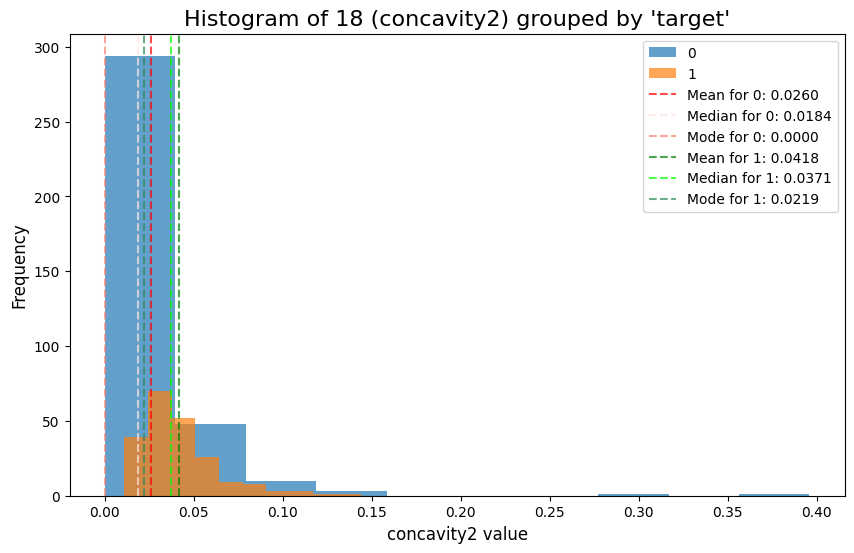

The concavity standard error feature of 'concavity2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of concavity, while the regional mode for both distributions also overlap.


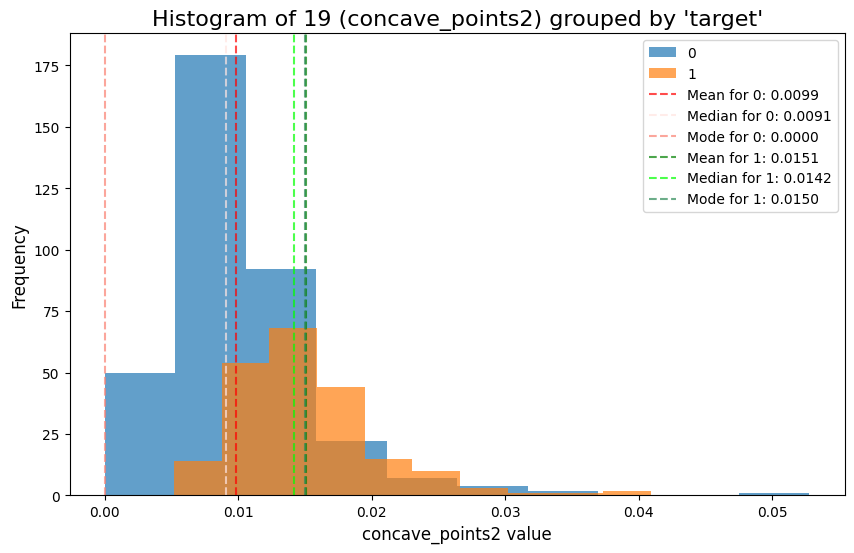

The concave points standard error feature of 'concave_points2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of concave points.


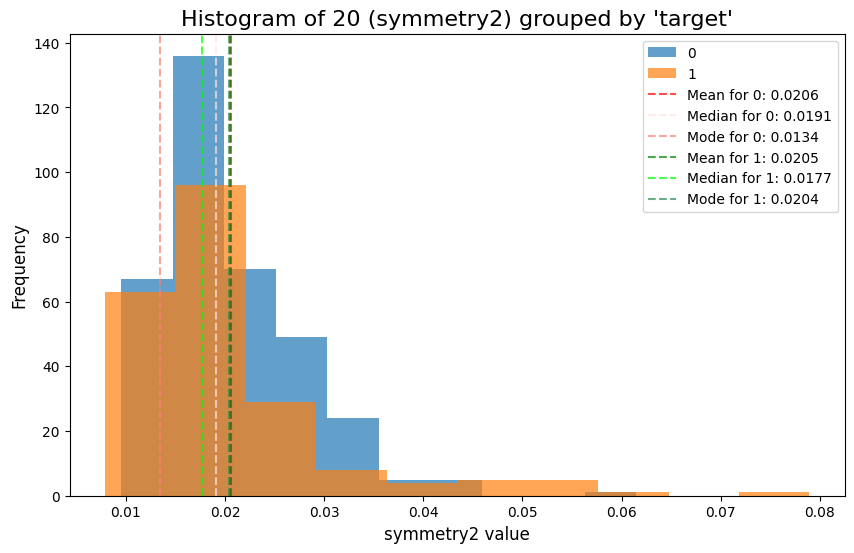

The symmetry standard error feature of 'symmetry2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of symmetry, while the mean, median and mode for both distributions are very close to each other and both distributions have overlapping regional modes.


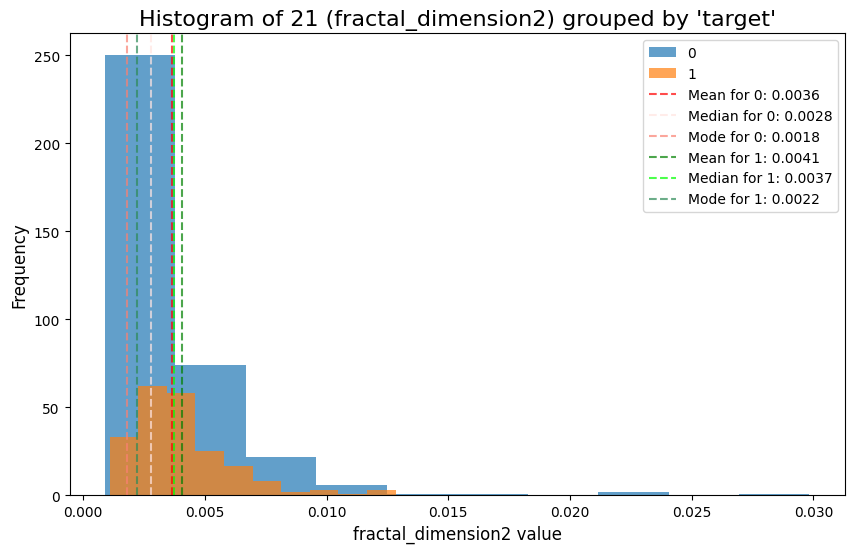

The fractal dimension standard error feature of 'fractal_dimension2' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the standard error of fractal dimension, wheremin the regional modes overlap and the mean, median, and mode for both distributions are very close to each other.


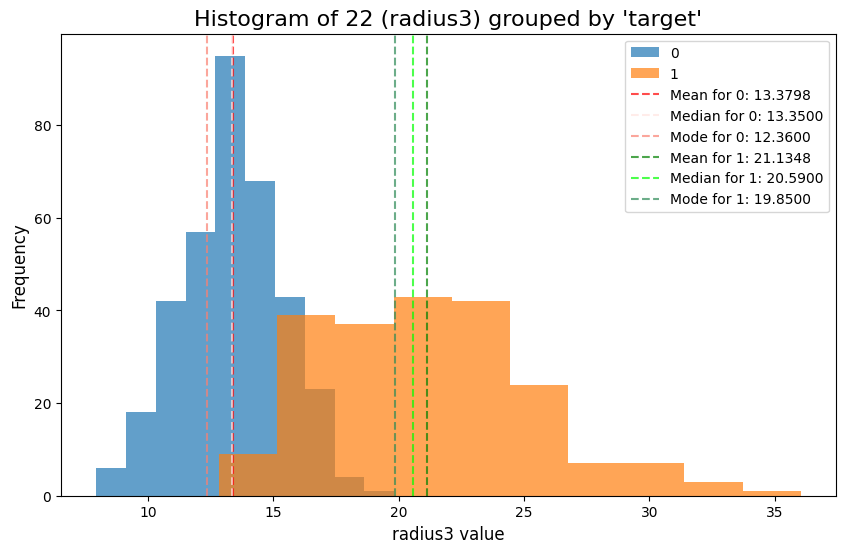

The maximum radius feature of 'radius3' has a dependent relationship with the target 'Diagnosis' variable as there is only slight overlap between the two distributions for the maximum radius, while the mean, median and mode for the two distributions are very far from each other.


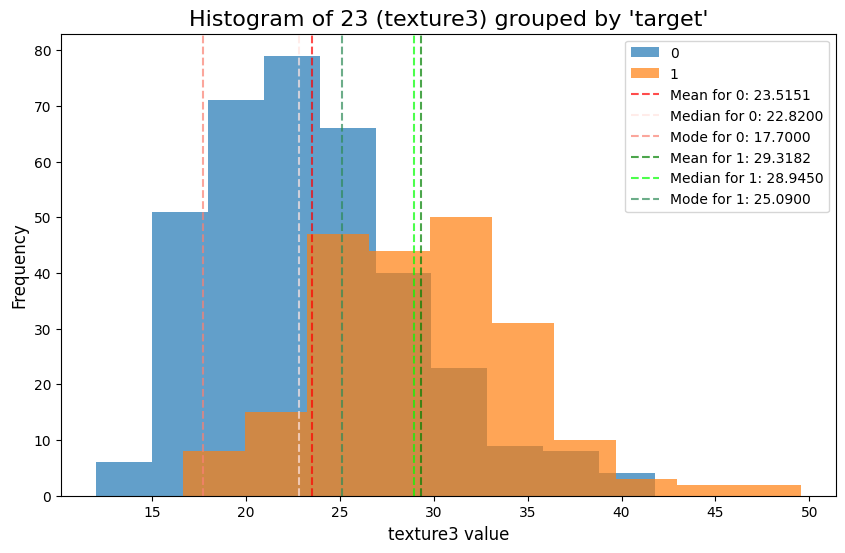

The maximum texture feature of 'texture3' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the maximum texture.


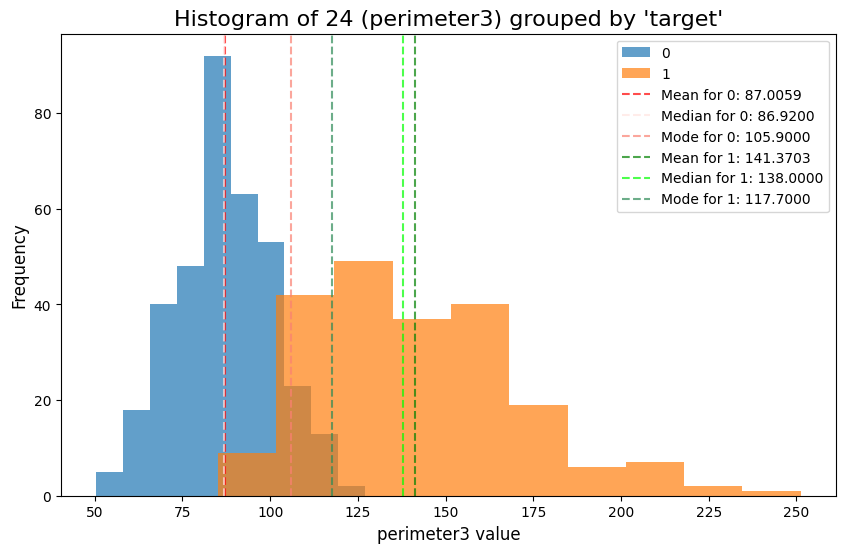

The maximum perimeter feature of 'perimeter3' has a dependent relationship with the target 'Diagnosis' variable as there is only some overlap between the two distributions for the maximum perimeter and their regional modes do not overlap.


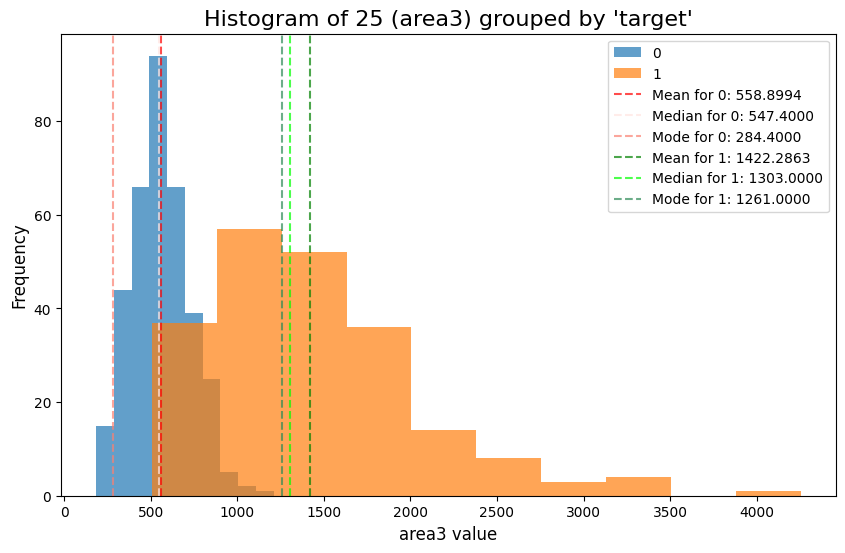

The maximum area feature of 'area3' has a dependent relationship with the target 'Diagnosis' variable as there is only some overlap between the two distributions for the maximum area, while the modes for each distribution do not overlap.


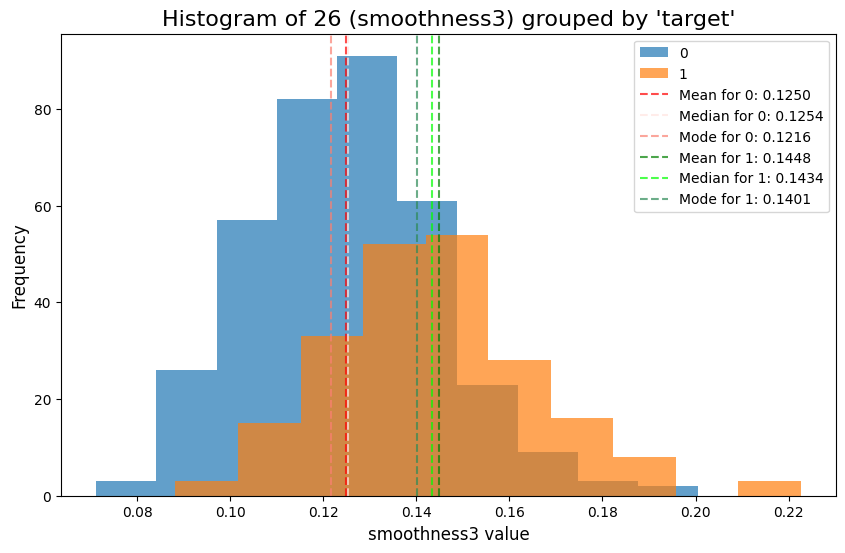

The maximum smoothness feature of 'smoothness3' has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the maximum smoothness value.


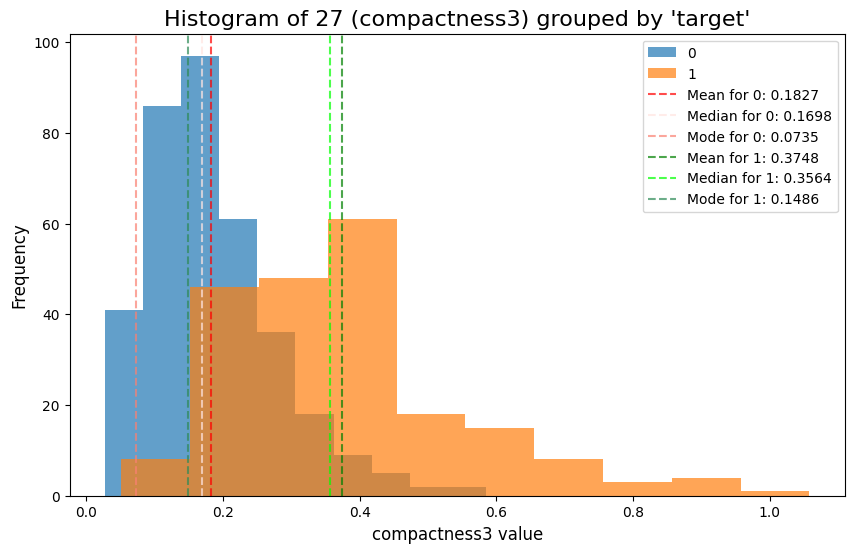

The maximum compactness feature of 'compactness3' has a likely dependent relationship with the target 'Diagnosis' variable as there is some overlap between the two distributions for the maximum compactness value, though their regional modes do not overlap.


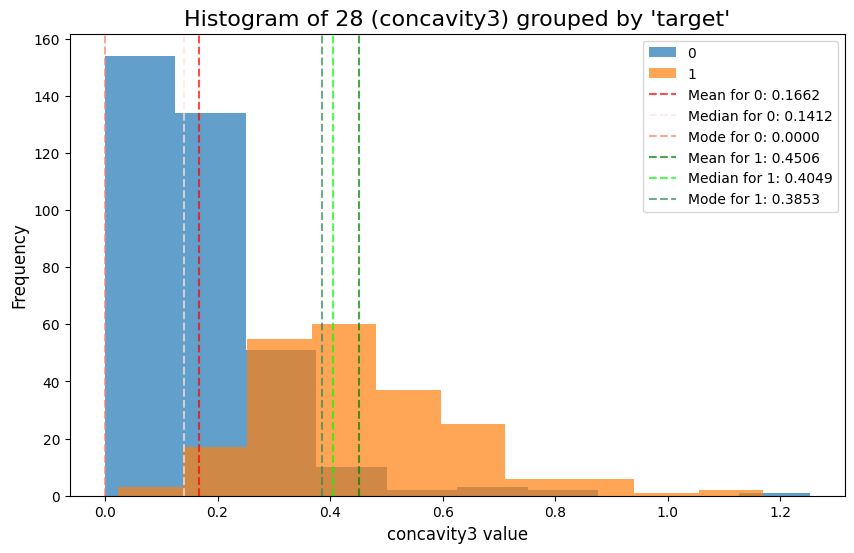

The maximum concavity feature of 'concavity3' has a dependent relationship with the target 'Diagnosis' variable as there is some overlap between the two distributions for the maximum concavity value.


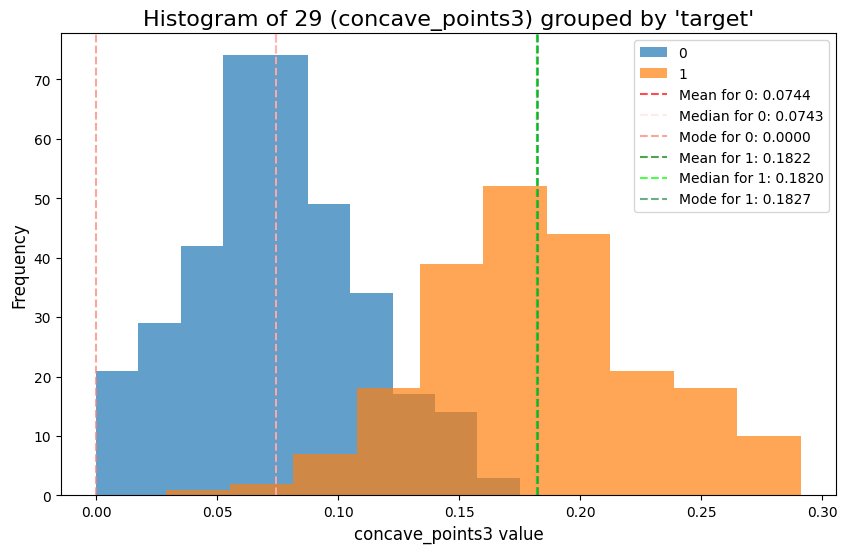

The maximum concave points feature of ‘concave_points3’ has a dependent relationship with the target 'Diagnosis' variable as there is only some overlap between the two distributions for the maximum concave points value, while there is a clear distinction between their regional modes.


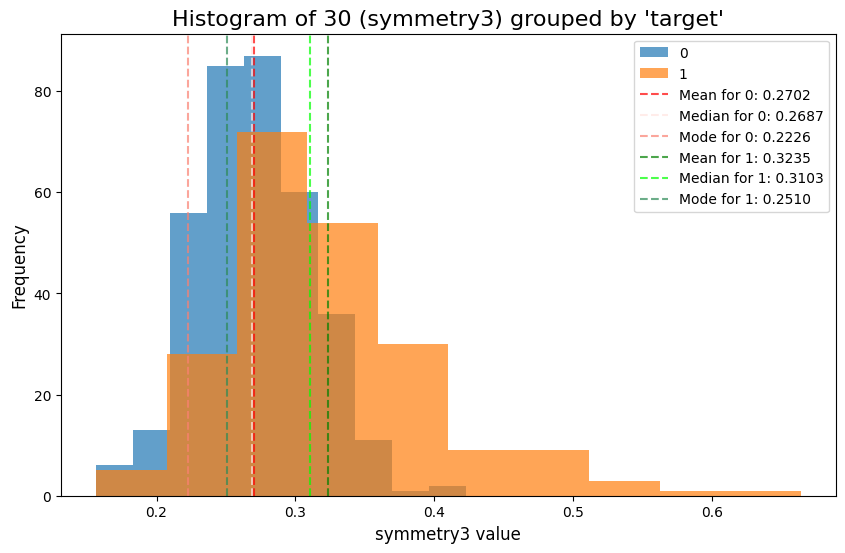

The maximum symmetry feature of ‘symmetry3’ has an independent relationship with the target 'Diagnosis' variable as there is significant overlap between the two distributions for the maximum symmetry and their regional modes also overlap.


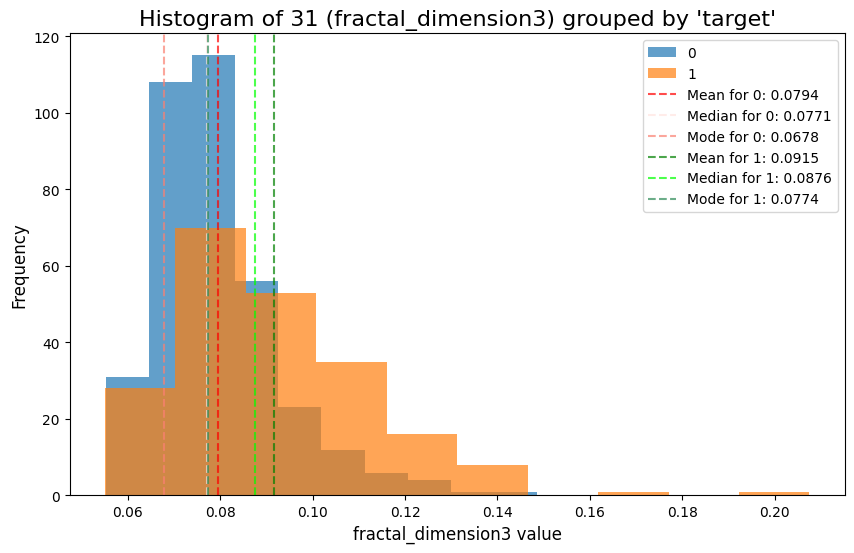

The maximum fractal dimension feature of ‘fractal_dimension3 has an independent relationship with the target 'Diagnosis' variable as there is considerable overlap between the two distributions for the maximum fractal dimension value and their regional modes also overlap.


In [ ]:
print("For the following distributions, each column is colored in by each value of the " +
    "target 'Diagnosis' variable, which can be either 0 or 1 to denote a benign or malignant " +
    "case of breast cancer cells for each observation.")

for i, c in enumerate(bcwd_features.columns):
    # Separate the data based on the target value
    c_0 = bcwd_renamed[bcwd_renamed["Diagnosis"] == 0]
    c_1 = bcwd_renamed[bcwd_renamed["Diagnosis"] == 1]

    # Figure size
    plt.figure(figsize=(10, 6))

    # The column grouped by a target value of 0 (benigh)
    plt.hist(c_0[c], bins=10, alpha=0.7, label=f"0")
    # The column grouped by a target value of 1 (malignant)
    plt.hist(c_1[c], bins=10, alpha=0.7, label=f"1")

    # Mean, median and mode vertical lines for target = 0
    plt.axvline(x=c_0[c].mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f"Mean for 0: {c_0[c].mean():.4f}")
    plt.axvline(x=c_0[c].median(), color='mistyrose', linestyle='--', linewidth=1.5, alpha=0.7, label=f"Median for 0: {c_0[c].median():.4f}")
    plt.axvline(x=c_0[c].mode().iloc[0], color='salmon', linestyle='--', linewidth=1.5, alpha=0.7, label=f"Mode for 0: {c_0[c].mode().iloc[0]:.4f}")

    # Mean, median and mode vertical lines for target = 1
    plt.axvline(x=c_1[c].mean(), color='green', linestyle='--', linewidth=1.5, alpha=0.7, label=f"Mean for 1: {c_1[c].mean():.4f}")
    plt.axvline(x=c_1[c].median(), color='lime', linestyle='--', linewidth=1.5, alpha=0.7, label=f"Median for 1: {c_1[c].median():.4f}")
    plt.axvline(x=c_1[c].mode().iloc[0], color='seagreen', linestyle='--', linewidth=1.5, alpha=0.7, label=f"Mode for 1: {c_1[c].mode().iloc[0]:.4f}")

    # Plot the legend and labels
    plt.legend()
    plt.title(f"Histogram of {p2_names[1:][i]} ({c}) grouped by 'target'", fontsize=16)
    plt.ylabel("Frequency", fontsize=12)
    plt.xlabel(f"{c} value", fontsize=12)

    plt.show()
    plt.close()

    # Print the description associated with the given column name
    print(bcwd_description[p2_names[1:][i]])

### Step 5: Performing OLS regression to find the Average Loss over the entire dataset

<h4>Creating the ordinary least squares regression (OLS) model</h4>
<p>For this task, I used the "sklearn.linear_model" library to generate a linear regression model fitted to the features and target of the BCWD dataset.</p>

In [ ]:
# YOUR CODE HERE

# Fit a new OLS model for OLS regression:
ols_model = sklearn.linear_model.LinearRegression().fit(bcwd_features, bcwd_target)

<p>Then, I fed the features into this model to generate predictions for the target variable.</p>
<p>The output below is limited to the first 10 entries:</p>

In [ ]:
# OLS Predictions as a function of bcwd_features:
ols_predictions = ols_model.predict(bcwd_features)
print(ols_predictions[:10])

[1.04557482 0.84213036 1.13131986 1.19228819 0.8344466  0.69886256
 0.8497074  0.63199112 0.69821005 1.15465278]


<p>Next, I wanted to demonstrate the summary statistics for this model (mean, median and mode).</p>

In [ ]:
print(f"For this model, which uses ordinary least squares regression, the predicted output has the following summary statistics:")
print(f"• Mean: {ols_predictions.mean()}.")
print(f"• Median: {np.median(ols_predictions)}.")
print(f"• Mode: {scipy.stats.mode(ols_predictions).mode.item()}.")

For this model, which uses ordinary least squares regression, the predicted output has the following summary statistics:
• Mean: 0.37258347978910294.
• Median: 0.2229600506924201.
• Mode: -0.42299516187581654.


<p>Then, I proceeded to calculate the average loss (mean squared error) of the OLS model, as seen in the print statement that follows.</p>

In [ ]:
# Mean squared error as the average loss of the model over the entire dataset:
ols_mse = np.mean((bcwd_target - ols_predictions) ** 2)
print(f"The average loss (mean squared error) of this OLS model between the actual and predicted target is {ols_mse}.")

The average loss (mean squared error) of this OLS model between the actual and predicted target is 0.052755004430519115.


<h4>Plotting the OLS Model</h4>
<p>I sought to ensure that the plot for the OLS model would be as informative as possible, and so I added the following elements:</p>
<ul>
    <li>The plot of the actual target values (x-axis) and the OLS models' predicted target values (y-axis).</li>
    <li>The mean predicted value for the target value of 0 to visually demonstrate the model's average prediction when the actual target value is 0.</li>
    <li>The mean predicted value for the target value of 1 to visually demonstrate the model's average prediction when the actual target value is 1.</li>
    <li>The "best fit" line for the predictive model to visually demonstrate the model's variance from the actual target values of 0 and 1, respectively.</li>
</ul>

In [ ]:
# target = 0 and target = 1 predicted values
ols_pred_0 = ols_predictions[bcwd_target == 0]
ols_pred_1 = ols_predictions[bcwd_target == 1]

# target = 0 and target = 1 means
ols_0_mean = np.mean(ols_pred_0)
ols_1_mean = np.mean(ols_pred_1)

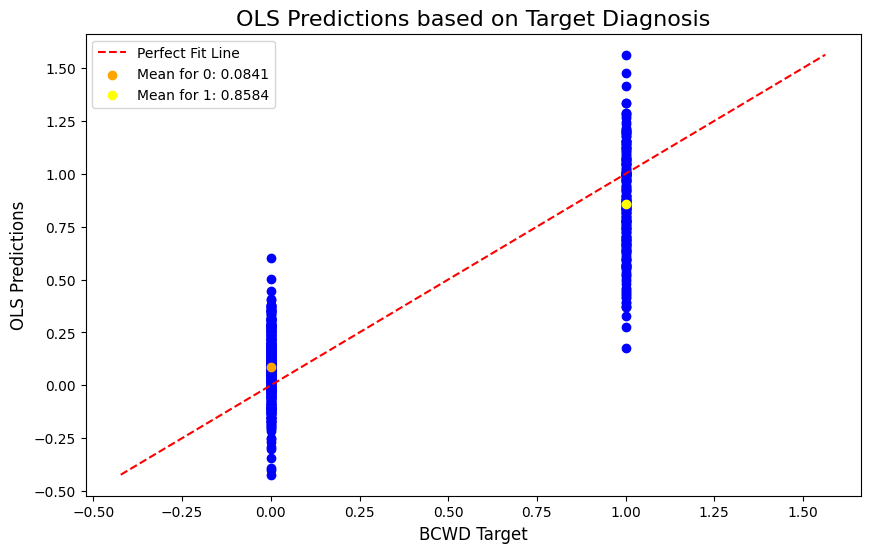

In [ ]:
# Plot the OLS predicted values against the actual target value
plt.figure(figsize=(10, 6))
plt.scatter(bcwd_target, ols_predictions, color="blue", marker="o")

# Plot the perfect fit line
plt.plot([min(ols_predictions), max(ols_predictions)], [min(ols_predictions), max(ols_predictions)], color="red", linestyle="--", label="Perfect Fit Line")

# Identify the mean values for each target value
plt.scatter(0, ols_0_mean, color="orange", label=f"Mean for 0: {ols_0_mean:.4f}")
plt.scatter(1, ols_1_mean, color="yellow", label=f"Mean for 1: {ols_1_mean:.4f}")

# Add labels, title, and legend
plt.xlabel("BCWD Target", fontsize=12)
plt.ylabel("OLS Predictions", fontsize=12)
plt.title("OLS Predictions based on Target Diagnosis", fontsize=16)
plt.legend()

# Display the plot
plt.show()
plt.close()

### Step 6: Finding the single best feature to predict a diagnosis


<h4>Finding the best single feature predictor of the target</h4>
<p>I began this process by calculating the target value's total sum of squares (TSS), then I printed out a statement to that effect (which I have commented out due to formatting reasons).  I also created the R-squared scores list to collect the R-squared scores to be processed later to obtain the maximum score.</p>
<p>The following code instantiates this:</p>

In [ ]:
# YOUR CODE HERE

# TSS for the target variable
target_tss = np.sum((bcwd_target - np.mean(bcwd_target)) ** 2)
r2_scores_list = []
single_mse_list = []

# print(f"For the actual target (Diagnosis) value, the total sum of squares is {target_tss}.")

<p>Then, I generated a for loop to loop through each column of the renamed BCWD dataset.</p>
<p>This for loop contains the following elements:</p>
<ul>
    <li>A temporary model created to fit the specific column and the actual target variable.</li>
    <li>The predictions generated by this model.</li>
    <li>The residual sum of squares (RSS) calculated from this model's predictions.</li>
    <li>The R-squared value calculated from this model's predictions and added it to the R-squared scores list.</li>
</ul>
<p>Additionally, I created the following print statements that I have, since, commented out due to formatting and practical reasons:</p>
<ul>
    <li>I used the sklearn.metrics.r2_score(target, feature) method to check for the accuracy of each generated R-squared value to ensure that my calculations were correct and printed out the results of both the trivialized calculation and my calculation for the R-squared value.</li>
    <li>I also generated print statements for the expected output to generate individual R-squared scores for each column for comparison with the previous OLS model.</li>
</ul>

In [ ]:
for i, c in enumerate(bcwd_features.columns):
    # Fit a new OLS model for OLS regression:
    temp_model = sklearn.linear_model.LinearRegression().fit(bcwd_features[[c]], bcwd_target)

    # OLS Predictions as a function of bcwd_features:
    temp_predictions = temp_model.predict(bcwd_features[[c]])

    # RSS for the given column
    temp_rss = np.sum((bcwd_target - temp_predictions) ** 2)

    # MSE for the given column
    temp_mse = np.mean((bcwd_target - temp_predictions) ** 2)

    # R-squared value for the given column
    temp_r2 = 1 - (temp_rss / target_tss)

    # Add the temporary R-squared value to the list
    r2_scores_list.append(temp_r2)
    single_mse_list.append(temp_mse)

    # Test against the trivialized r2_score measure from the sklearn.metrics library
        # to ensure my understanding of R-squared:
    # temp_r2_2 = sklearn.metrics.r2_score(bcwd_target, temp_predictions)
    # print(temp_r2, "vs", temp_r2_2)

    # Print statements:
    # print(f"For Column {p2_names[1:][i]} ({c}), the RSS is {temp_rss}.")
    # print(f"• Using these components, 1 - ({temp_rss}/{target_tss}) provides an R-squared value of {temp_r2} for Column {c}.")
    # print()

<h4>Generating the R-squared score for each column</h4>
<p>I copied the output of the previous print statement (to provide individualized R-squared scores for each column) and placed it in the Markdown cell below to ensure that I could properly format these contents for readability as well as add in further context in a manner that's more accessible to my working style.</p>
<p>The outputs are as follows:</p>

For the actual target (Diagnosis) value, the total sum of squares is 133.01230228471002.\
\
\
R-squared score of the calculated mean among all cell nuclei in each observation:\
\
For Column 2 (radius1), the RSS is 62.12450943807403.\
• Using these components, 1 - (62.12450943807403/133.01230228471002) provides an R-squared value of 0.532941627421065 for Column radius1.\
\
For Column 3 (texture1), the RSS is 110.08379681462145.\
• Using these components, 1 - (110.08379681462145/133.01230228471002) provides an R-squared value of 0.17237883320755243 for Column texture1.\
\
For Column 4 (perimeter1), the RSS is 59.65501599057066.\
• Using these components, 1 - (59.65501599057066/133.01230228471002) provides an R-squared value of 0.5515075300111687 for Column perimeter1.\
\
For Column 5 (area1), the RSS is 66.15259373015935.\
• Using these components, 1 - (66.15259373015935/133.01230228471002) provides an R-squared value of 0.5026580805393389 for Column area1.\
\
For Column 6 (smoothness1), the RSS is 115.91154257961588.\
• Using these components, 1 - (115.91154257961588/133.01230228471002) provides an R-squared value of 0.1285652485624249 for Column smoothness1.\
\
For Column 7 (compactness1), the RSS is 85.67955150941883.\
• Using these components, 1 - (85.67955150941883/133.01230228471002) provides an R-squared value of 0.35585242840152065 for Column compactness1.\
\
For Column 8 (concavity1), the RSS is 68.51239674391371.\
• Using these components, 1 - (68.51239674391371/133.01230228471002) provides an R-squared value of 0.48491684177254235 for Column concavity1.\
\
For Column 9 (concave_points1), the RSS is 52.78871790333883.\
• Using these components, 1 - (52.78871790333883/133.01230228471002) provides an R-squared value of 0.6031290565112866 for Column concave_points1.\
\
For Column 10 (symmetry1), the RSS is 118.4834623636707.\
• Using these components, 1 - (118.4834623636707/133.01230228471002) provides an R-squared value of 0.10922929436963391 for Column symmetry1.\
\
For Column 11 (fractal_dimension1), the RSS is 132.99038131951906.\
• Using these components, 1 - (132.99038131951906/133.01230228471002) provides an R-squared value of 0.00016480404304286544 for Column fractal_dimension1.\
\
\
R-squared score of the standard error among all cell nuclei in each observation:\
\
For Column 12 (radius2), the RSS is 90.2301228621829.\
• Using these components, 1 - (90.2301228621829/133.01230228471002) provides an R-squared value of 0.32164077072324315 for Column radius2.\
\
For Column 13 (texture2), the RSS is 133.00313170650765.\
• Using these components, 1 - (133.00313170650765/133.01230228471002) provides an R-squared value of 6.894533847512374e-05 for Column texture2.\
\
For Column 14 (perimeter2), the RSS is 91.87259717277338.\
• Using these components, 1 - (91.87259717277338/133.01230228471002) provides an R-squared value of 0.309292482013265 for Column perimeter2.\
\
For Column 15 (area2), the RSS is 93.03377273119669.\
• Using these components, 1 - (93.03377273119669/133.01230228471002) provides an R-squared value of 0.3005626462125295 for Column area2.\
\
For Column 16 (smoothness2), the RSS is 132.41492465871661.\
• Using these components, 1 - (132.41492465871661/133.01230228471002) provides an R-squared value of 0.004491145673989783 for Column smoothness2.\
\
For Column 17 (compactness2), the RSS is 121.59338805297476.\
• Using these components, 1 - (121.59338805297476/133.01230228471002) provides an R-squared value of 0.08584855713040218 for Column compactness2.\
\
For Column 18 (concavity2), the RSS is 124.4491306572118.\
• Using these components, 1 - (124.4491306572118/133.01230228471002) provides an R-squared value of 0.06437879414468695 for Column concavity2.\
\
For Column 19 (concave_points2), the RSS is 110.86594744880142.\
• Using these components, 1 - (110.86594744880142/133.01230228471002) provides an R-squared value of 0.16649854528872665 for Column concave_points2.\
\
For Column 20 (symmetry2), the RSS is 133.00664483260164.\
• Using these components, 1 - (133.00664483260164/133.01230228471002) provides an R-squared value of 4.253329963621599e-05 for Column symmetry2.\
\
For Column 21 (fractal_dimension2), the RSS is 132.2036276733363.
• Using these components, 1 - (132.2036276733363/133.01230228471002) provides an R-squared value of 0.006079697873680567 for Column fractal_dimension2.\
\
\
R-squared score for the maximum cell nucleus measurement:\
\
For Column 22 (radius3), the RSS is 52.82178292834787.\
• Using these components, 1 - (52.82178292834787/133.01230228471002) provides an R-squared value of 0.6028804702945149 for Column radius3.\
\
For Column 23 (texture3), the RSS is 105.2446290267915.\
• Using these components, 1 - (105.2446290267915/133.01230228471002) provides an R-squared value of 0.20876018820035458 for Column texture3.\
\
For Column 24 (perimeter3), the RSS is 51.48180690055977.\
• Using these components, 1 - (51.48180690055977/133.01230228471002) provides an R-squared value of 0.612954546186532 for Column perimeter3.\
\
For Column 25 (area3), the RSS is 61.38528632483319.\
• Using these components, 1 - (61.38528632483319/133.01230228471002) provides an R-squared value of 0.5384991818768817 for Column area3.\
\
For Column 26 (smoothness3), the RSS is 109.38497732540783.\
• Using these components, 1 - (109.38497732540783/133.01230228471002) provides an R-squared value of 0.17763262911372213 for Column smoothness3.\
\
For Column 27 (compactness3), the RSS is 86.55390937745851.\
• Using these components, 1 - (86.55390937745851/133.01230228471002) provides an R-squared value of 0.34927891713210335 for Column compactness3.\
\
For Column 28 (concavity3), the RSS is 75.14056099751642.\
• Using these components, 1 - (75.14056099751642/133.01230228471002) provides an R-squared value of 0.43508562962334385 for Column concavity3.\
\
For Column 29 (concave_points3), the RSS is 49.24820082385691.\
• Using these components, 1 - (49.24820082385691/133.01230228471002) provides an R-squared value of 0.6297470235614584 for Column concave_points3.\
\
For Column 30 (symmetry3), the RSS is 109.96114348331852.\
• Using these components, 1 - (109.96114348331852/133.01230228471002) provides an R-squared value of 0.17330095341144447 for Column symmetry3.\
\
For Column 31 (fractal_dimension3), the RSS is 119.06021697339894.\
• Using these components, 1 - (119.06021697339894/133.01230228471002) provides an R-squared value of 0.10489319462681679 for Column fractal_dimension3.

<h4>Compare the single feature model with the OLS model in Problem 5</h4>
<p>To compare this model with the previous OLS model in Problem 5 I, first, instantiated the r2_scores_list as an array for processing.  Then, I used the maximum R-squared value's index to determine the maximum R-squared value and obtain both the PMLB and non-PMLB column names.</p>
<p>I also used this index value to find both the actual maximum R-squared value and the corresponding MSE for this same column.</p>
<p>Finally, I calculated the OLS model's R-squared value using the "ols_mse" variable.</p>

In [ ]:
# Instantiate the R-squared scores as a NumPy array for proper analysis
r2_scores = np.asarray(r2_scores_list)
# print(r2_scores)

# Determine the column with the maximum R-squared score
r2_pmlb_col_max = p2_names[1:][np.argmax(r2_scores)]

# Print statement to confirm validity
# print(p2_names[1:][np.argmax(r2_scores)], bcwd_names['29'], np.argmax(r2_scores))

# Determine the corresponding column in the non-PMLB dataset
r2_col_max = bcwd_features.columns[np.argmax(r2_scores)]

# Determine the maximum R-squared value, which corresponds to the column referred to by r2_pmlb_col_max and r2_col_max
r2_max = r2_scores[np.argmax(r2_scores)]
single_mse = single_mse_list[np.argmax(r2_scores)]

# Determine the R-squared score for the OLS model
ols_r2_score = 1 - (np.sum((bcwd_target - ols_predictions) ** 2) / np.sum((bcwd_target - np.mean(bcwd_target)) ** 2))

# Print statements
print(f'The column with the maximum R-squared score is "{r2_pmlb_col_max}" representing "{r2_col_max}" which has an R-squared score of {r2_max} and a mean squared error of {single_mse}.')
print(f'The OLS model in Problem 5 has an R-squared score of {ols_r2_score} and a mean squared error of {ols_mse}.')

The column with the maximum R-squared score is "29" representing "concave_points3" which has an R-squared score of 0.6297470235614584 and a mean squared error of 0.08655219828445855.
The OLS model in Problem 5 has an R-squared score of 0.7743246526421793 and a mean squared error of 0.052755004430519115.


<p>Thus, we can see that the R-squared value for the OLS model in Problem 5 is higher than the R-squared value for this model, while the MSE value for the OLS model is also lower than that of this model.  This indicates that the OLS model has a lesser variance than this model and may be more accurate as a predictor for the actual target value.</p>

### Step 7: Finding a column pair of input columns with a visible dependency

<h4>Plotting a correlation matrix</h4>
<p>My approach to choosing a pair of input columns began with plotting a correlation matrix amongst all of the features for the BCWD dataset (using the "bcwd_features" variable, a subset of the renamed dataset including only the features), which I colored using the "gist_rainbow" color map.</p>
<p>This matrix is instantiated in the code below:</p>

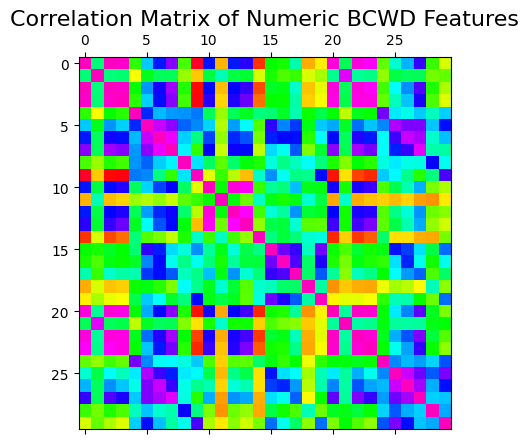

In [ ]:
# YOUR CODE HERE

# Plot the correlation matrix of numeric columns in the BCWD dataset as a heatmap
    # Use the color map "gist_rainbow"
plt.matshow(bcwd_features.corr(numeric_only=True), cmap="gist_rainbow")

# Set the title of the heat map
plt.title("Correlation Matrix of Numeric BCWD Features", fontsize=16)
plt.show()

<p>From this correlation matrix, I chose to investigate different pairs with strong correlations for visible dependencies.  However, I had to experiment, first, with viewing the scatterplots for different pairs of interest until I found a pair with an actual visible dependency.</p>
<p>I accomplished this by plotting different column pairs with high correlation until I found a pair that I believed was suitable.  For me, this was the case when I stumbled upon the plot for the "perimeter3" and "perimeter1" column pair.</p>
<p>This plot can be found below:</p>

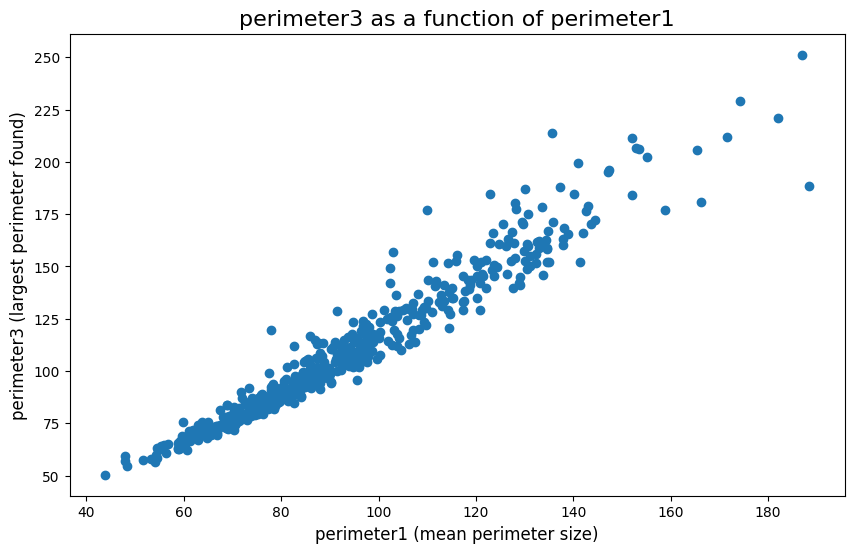

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(bcwd_features[bcwd_features.columns[2]], bcwd_features[bcwd_features.columns[22]])
plt.title(f"{bcwd_features.columns[22]} as a function of {bcwd_features.columns[2]}", fontsize=16)
plt.xlabel(f"{bcwd_features.columns[2]} (mean {bcwd_features.columns[2][:-1]} size)", fontsize=12)
plt.ylabel(f"{bcwd_features.columns[22]} (largest {bcwd_features.columns[22][:-1]} found)", fontsize=12)
plt.show()
plt.close()

<p>I prioritized choosing different pairs colored in the warmest colors and experimented with them until I found the pair of "perimeter1" and "perimeter3", which appear to have a visible dependency.</p>
<p>This is sensible as "perimeter1" refers to the mean value of an observed collection of breast mass cell nuclei in an observation, whereas "perimeter3" refers to the maximum perimeter of a single breast cancer cell nucleus associated with the aforementioned collection of cell nuclei in an observation.</p>
<p>Naturally, you would expect that the largest cell nuclei perimeter would be found in the observation with the largest mean perimeter.</p>
<p>I, then, proceeded to assign these columns as the 1st and 2nd columns in the column pair, respectively.</p>

In [ ]:
dependency_col_1 = bcwd_features.columns[2]
dependency_col_2 = bcwd_features.columns[22]

print(f"Columns {p2_names[1:][22]} ({bcwd_names['24']}) and {p2_names[1:][2]} ({bcwd_names['4']}) are a column pair with a visible dependency.")

Columns 24 (perimeter3) and 4 (perimeter1) are a column pair with a visible dependency.


<p>To confirm a decent correlation, I calculated the RSS and TSS of the pair, with the 1st and 2nd columns as the x and y columns, respectively.  Then, I calculated the R-squared value (using these variables) to check for the correlation between the two columns.</p>

In [ ]:
pair_rss = np.sum((bcwd_features[dependency_col_2] - bcwd_features[dependency_col_1]) ** 2)
pair_tss = np.sum((bcwd_features[dependency_col_2] - np.mean(bcwd_features[dependency_col_2])) ** 2)
pair_r2 = 1 - (pair_rss / pair_tss)
print(f"The R-squared score of the two measures for the mean vs the maximum value of the perimeter is {pair_r2}")

The R-squared score of the two measures for the mean vs the maximum value of the perimeter is 0.6730428824283943


<p>Though there are column pairs with stronger R-squared values, "perimeter1" and "perimeter3" have a visible dependency when plotted against each other on a scatterplot, and so I decided to keep this column pair for Problem 7.</p>

<h4>Plotting the histogram for the column pair</h4>
<p>I proceeded to plot a histogram based off of a column split on "perimeter1" (the mean perimeter).  To do this, I implemented the following steps:</p>
<ul>
    <li>I used the 1st column (perimeter1) as the split column and used its median value to determine the split point.</li>
    <li>Then, I created two sets of data using the split on the "perimeter1" column.</li>
    <li>I proceeded to plot the values of "perimeter3" using the two histogram distributions for the associated "perimeter1" values above and below the split, with the values above the split colored as "orange" and those below colored as "blue".</li>
    <li>I also placed a vertical line using the median of the "perimeter3" column to add further context on the impact of the two "perimeter1" distributions on "perimeter3" when paired together and, more easily, determine the nature of their distribution.</li>
</ul>

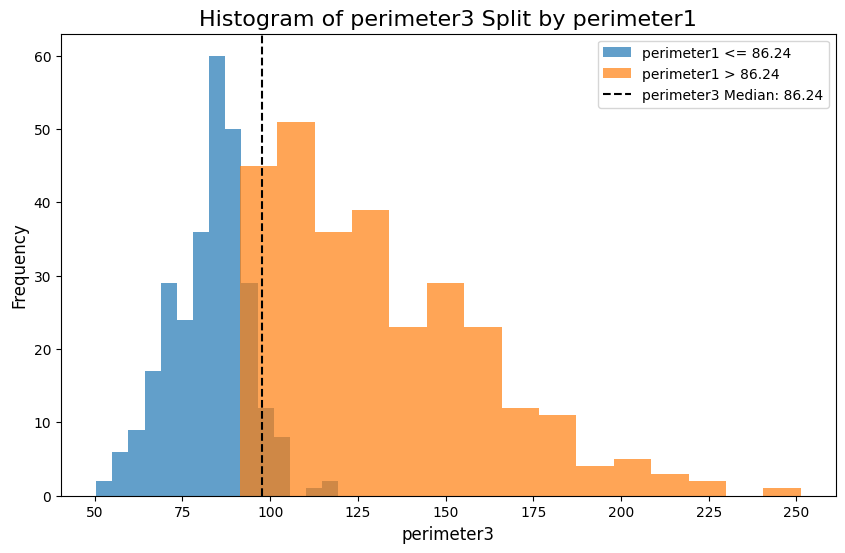

In [ ]:
# Choose the column for the split (x-column), renamed for understanding
split_column = dependency_col_1

# Decide on where to split on the x-column
split_point = bcwd_features[dependency_col_1].median()

# Separate the data based on the split
below_split = bcwd_features[bcwd_features[split_column] <= split_point]
above_split = bcwd_features[bcwd_features[split_column] > split_point]

# Choose the column for comparison (y-column), renamed for understanding
comparison_column = dependency_col_2

# Plot histogram for both sides of the split (target = 0 & target = 1)
plt.figure(figsize=(10, 6))
plt.hist(below_split[comparison_column], bins=15, alpha=0.7, label=f"{split_column} <= {split_point:.2f}")
plt.hist(above_split[comparison_column], bins=15, alpha=0.7, label=f"{split_column} > {split_point:.2f}")

# Graph the split as a vertical dashed line
plt.axvline(x=bcwd_features[comparison_column].median(), color='black', linestyle='--', linewidth=1.5, label=f"{comparison_column} Median: {split_point:.2f}")

# Plot labels for the histogram
plt.title(f"Histogram of {comparison_column} Split by {split_column}", fontsize=16)
plt.xlabel(comparison_column, fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()
plt.close()

<p>Finally, I also decided to quench my curiosity and plot these values as a scatterplot, plotting 'perimeter3' on the x-axis and 'perimeter1' on the y-axis, then coloring each plot value based on their affiliation with being above or below the split point.</p>

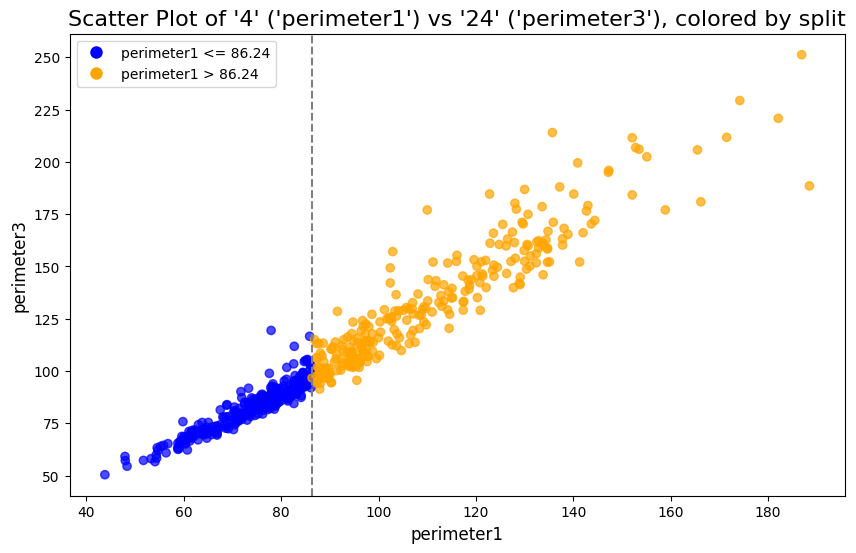

In [ ]:
# Analyze this column pair as a scatterplot

# Assign colors based on the split point (blue below the split & orange above the split)
colors = np.where(bcwd_features[split_column] <= split_point, "blue", "orange")

# Step 3: Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(bcwd_features[split_column], bcwd_features[comparison_column], c=colors, alpha=0.7)

# Graph the split as a vertical dashed line
plt.axvline(x=split_point, color='gray', linestyle='--', linewidth=1.5, label=f"Split Point: {split_point:.2f}")

# Add titles and labels
plt.title(f"Scatter Plot of '4' ('perimeter1') vs '24' ('perimeter3'), colored by split", fontsize=16)
plt.xlabel(split_column, fontsize=12)
plt.ylabel(comparison_column, fontsize=12)

# Add a suitable legend
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=f"{split_column} <= {split_point:.2f}"),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label=f"{split_column} > {split_point:.2f}")
])

# Show the plot
plt.show()

### Step 8: Performing Principal Components Analysis (PCA) on all Features

<h4>Performing PCA on the BCWD dataset's Features</h4>
<p>To perform principal components analysis (PCA) on the features of the BCWD dataset, I imported PCA from sklearn's decomposition module, then I filtered for numeric type features within the dataset as only those features can be subject to PCA.</p>
<p>After this, I instantiated a new PCA object to serve as a model for this analysis, then fit it with the aforementioned numeric features (and dropping NA values).</p>
<p>Finally, I generated a Pandas dataframe of BCWD dataset's principal components, with each row being a unit vector representing a principal component to indicate the contribution (or loading) of each feature to each feature as a principal component (of course, not in the same order that they appear as features in the BCWD dataset).  I also instantiated the explained variance of the principal components as the "explained_variance" variable.</p>
<p>This code is instantiated below, along with a preview of the first 10 rows of the first 10 columns of the principal components for the BCWD dataset.</p>

In [ ]:
# YOUR CODE HERE
from sklearn.decomposition import PCA

# Obtain the numeric columns
bcwd_pca_columns = [c for c in bcwd_features.columns if bcwd_features[c].dtype == 'float64']

# Generate a PCA object, then fit it with the numeric columns from the BCWD dataset
bcwd_pca = sklearn.decomposition.PCA()
bcwd_pca.fit(bcwd_renamed[bcwd_pca_columns].dropna())

# Obtain the PCA compononets from the fitted PCA model and plot the first 10 rows
    # of the first 10 columns
bcwd_components = pd.DataFrame(bcwd_pca.components_, columns=bcwd_pca_columns)
bcwd_components.iloc[:10, :10]

# Explained variance of the principal components
explained_variance = bcwd_pca.explained_variance_

<p>Using these figures, I proceeded to plot the explained variance of the principal components as a line chart, while also filling in the shape within the bounds of the explained variance for each principal component to better show the contribution of each principal component to the total explained variance.</p>

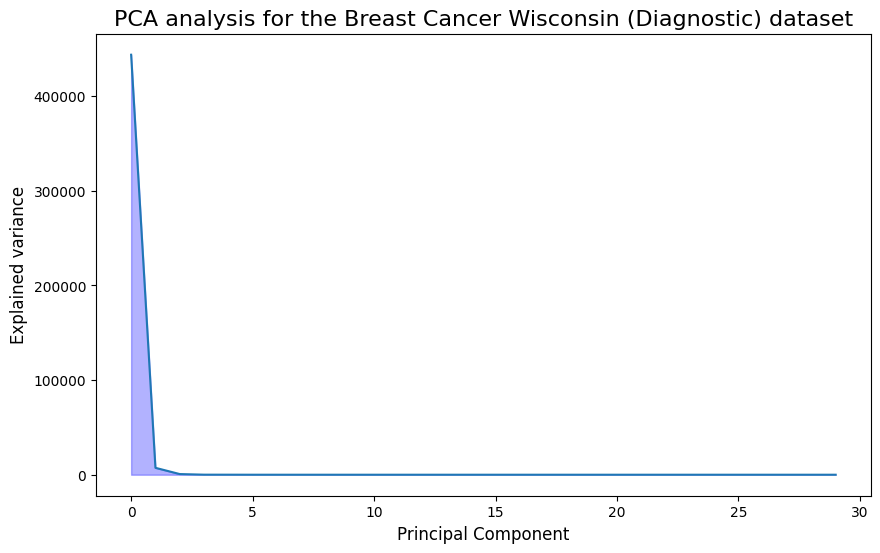

In [ ]:
# Plot the values of the explained_variance
plt.figure(figsize=(10, 6))
plt.plot(explained_variance)

# Fill the space under the explained_variance values
plt.fill_between(range(len(explained_variance)), explained_variance, color="blue", alpha=0.3)

plt.title("PCA analysis for the Breast Cancer Wisconsin (Diagnostic) dataset", fontsize=16)
plt.ylabel("Explained variance", fontsize=12)
plt.xlabel("Principal Component", fontsize=12)
plt.show()
plt.close()

<h4>Contribution of the first half of princpal components to the explained variance</h4>
<p>To find the total contribution of the first half of principal components to the explained variance, I began by finding the total variance (by summing up the explained variance), finding the total number of principal components, then finding the figure corresponding to half of this total number. Finally, I found the variance for the first half of principal components by getting the sum of the explained variance for the principal components up to half of the total number of principal components.</p>
<p>The corresponding code is instantiated below:</p>

In [ ]:
# Total variance
total_variance = np.sum(explained_variance)
print(f"The total explained variance sums up to {total_variance}.\n")

# Number of components
num_components = bcwd_components.shape[0]

# Number of components divided by 2 using integer division
    # to find the first half of the principal components
half_components = num_components // 2
print(f"The total number of components is {num_components}, while the first half of the principal components is located from component 0 to component {half_components - 1}.\n")

# First half of the components' variance
variance_first_half = np.sum(explained_variance[:half_components])
print(f"Thereby, the total explained variance for the first half of all principal components (amounting to {half_components} components) is {variance_first_half}\n")

# Summary of variance:
print(f"This indicates that the first half of principal components is responsible for {variance_first_half} out of the {total_variance} total explained variance.\n")
print(f"This amounts to {(variance_first_half / total_variance) * 100}% of the total variance defined by the first half of principal components.")

The total explained variance sums up to 451896.55625739874.

The total number of components is 30, while the first half of the principal components is located from component 0 to component 14.

Thereby, the total explained variance for the first half of all principal components (amounting to 15 components) is 451896.55442140717

This indicates that the first half of principal components is responsible for 451896.55442140717 out of the 451896.55625739874 total explained variance.

This amounts to 99.9999995937142% of the total variance defined by the first half of principal components.


<h4>Linear Regression for the First Half of Principal Components</h4>
<p>To fulfill the requirement of creating a linear regression model based on the first half of principal components data to predict for the target Diagnosis, I first identified the first half of components from the "bcwd_components" variable.  Next, to focus on only the first half of principal components (which explain the vast majority of the total explained variance), I projected the original features onto the lower-dimensional PCA space (first half of principal components). This reduces the dimensionality by focusing only on these most important, influential principal components.</p>
<p>The results of which are instantiated as the code below, alongside the first 10 rows of the first 10 columns of this projected data.</p>

In [ ]:
# First half of components
first_half_components = bcwd_components.iloc[:half_components]  # First half of components

# Project the numeric feature data onto the first half of components
bcwd_projected = bcwd_features[bcwd_pca_columns] @ first_half_components.T
bcwd_projected.iloc[:10, :10]

,0,1,2,3,4,5,6,7,8,9
0,2260.013886,-187.960301,17.912961,77.262942,-54.129246,16.565625,-3.404070,-0.356151,0.982284,1.570398
1,2368.993756,121.587424,-66.059971,50.689683,-17.793886,18.056912,-2.426695,-0.303514,2.213575,0.897004
2,2095.665202,145.113986,-32.375189,64.351626,-21.662230,20.483851,-1.692988,-0.778344,1.901621,0.794045
3,692.690510,38.576923,-21.992589,80.310834,-29.244221,16.531604,-1.205428,-0.564873,2.058385,0.836884
4,2030.212493,295.297984,-29.290636,60.051784,-29.742049,16.809879,-2.137210,-0.215210,1.691659,0.842537
5,888.280054,26.079796,-32.144893,71.450262,-29.749275,17.086172,-3.641289,-0.875101,1.575301,1.001023
6,1921.082212,58.807572,-62.920436,68.247120,-25.282072,16.325231,-2.047315,-0.842068,1.904496,1.246259
7,1074.781335,31.771228,-18.874723,75.659214,-25.105856,19.408948,-2.618382,-0.289912,2.134831,0.847544
8,908.578478,63.830753,-36.956749,79.088319,-23.839929,18.153550,-2.916614,-0.826942,1.221149,0.697198
9,861.578449,40.570735,-34.297586,81.160114,-13.279191,19.913722,-7.332222,-0.330960,1.168009,-0.002220


<p>Next, I created a color map, to color the designated target values as either blue (for 0, benign) or orange (for 1, malignant).</p>

In [ ]:
# Train a linear regression and fit to predict the target value based on the projected
    # values of the dataset onto the first half of the components
pca_model = sklearn.linear_model.LinearRegression()
pca_model.fit(bcwd_projected, bcwd_target)

# Predict the target values
pca_predictions = pca_model.predict(bcwd_projected)

# Manual MSE calculation by subtracting the PCA model's predicted values
    # from the actual target values
pca_mse = np.mean((bcwd_target - pca_predictions) ** 2)

# Print statements to output the findings
print(f"The average training loss (mean squared error) for this PCA model is {pca_mse}.")
print(f"Compare this with the previous model's (the single highest predictive feature) MSE of {single_mse}")
print(f"and the OLS model's MSE of {ols_mse}.")
print(f"The difference in MSE between the PCA model and the single most predictive feature model is {single_mse - pca_mse}.")
print(f"Meanwhile, the difference in MSE between OLS model and the PCA model is {pca_mse - ols_mse}.")

The average training loss (mean squared error) for this PCA model is 0.06110998723706235.
Compare this with the previous model's (the single highest predictive feature) MSE of 0.08655219828445855
and the OLS model's MSE of 0.052755004430519115.
The difference in MSE between the PCA model and the single most predictive feature model is 0.025442211047396197.
Meanwhile, the difference in MSE between OLS model and the PCA model is 0.008354982806543239.


<p>So, when comparing the training loss of this PCA model with that of the previous model (using only a single best predictive feature), it's apparent that the PCA model has a lower mean squared error than the previous model.  However, the PCA model has a higher mean squared error than the OLS model.</p>
<p>Thus, the PCA model offers lower variability than the single best predictive feature model, but higher variability than the OLS model.  Thus, this (PCA) model may be a better predictor of the target diagnosis than the single best predictive feature model, but inferior to the OLS model in this respect.</p>

<h4>Plotting the actual vs the PCA model's predicted values for the target</h4>
<p>In plotting the PCA model's predictions against the actual values for the target variable, I wanted to include the following elements:</p>
<ul>
    <li>The actual values of either 0 or 1 at the x-axis.</li>
    <li>The predicted values by the PCA model at the y-axis.</li>
    <li>The mean predicted target value for the actual target values of 0 and 1, respectively.</li>
</ul>
<p>And so I began by finding the mean predicted value for the actual target value of 0, then the mean predicted value for the actual target value of 1.</li>

In [ ]:
pca_0_mean = pca_predictions[bcwd_target == 0].mean()
pca_1_mean = pca_predictions[bcwd_target == 1].mean()

<p>Afterwards, I instantiated the plot between the PCA model's predicted values and the actual target diagnosis values, as seen in the code and graphic below:</p>

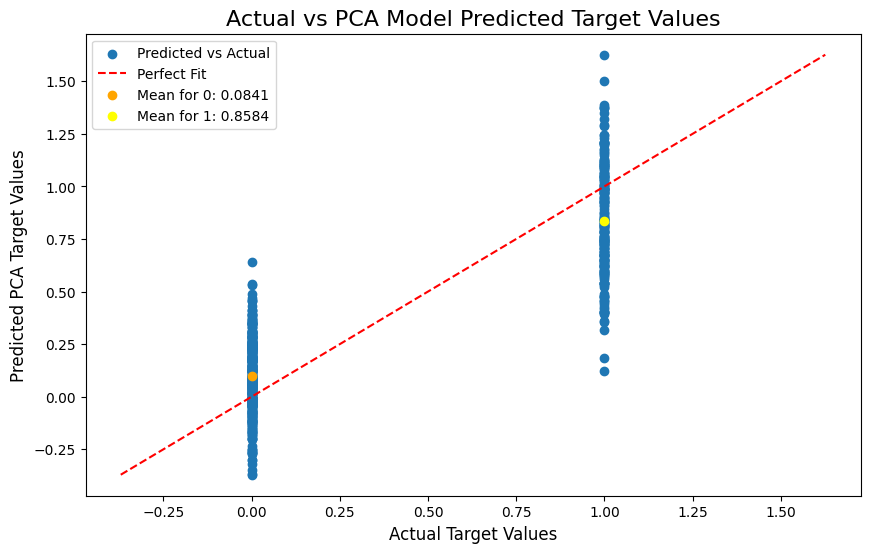

In [ ]:
# Plot Actual Targets vs PCA Predictions
plt.figure(figsize=(10, 6))
plt.scatter(bcwd_target, pca_predictions, label="Predicted vs Actual")

# PCA Prediction best fit line
plt.plot([min(pca_predictions), max(pca_predictions)], [min(pca_predictions), max(pca_predictions)], color="red", linestyle="--", label="Perfect Fit")

# Plot the mean values for target = 0 and target = 1
plt.scatter(0.0, pca_0_mean, color="orange", label=f"Mean for 0: {ols_0_mean:.4f}")
plt.scatter(1.0, pca_1_mean, color="yellow", label=f"Mean for 1: {ols_1_mean:.4f}")

plt.xlabel("Actual Target Values", fontsize=12)
plt.ylabel("Predicted PCA Target Values", fontsize=12)
plt.title("Actual vs PCA Model Predicted Target Values", fontsize=16)
plt.legend()
plt.show()

### Step 9: Finding the Highest Correlative Feature Pair

<h4>Finding the highest correlation among the column pairs</h4>
<p>To find the column pair with the highest correlation I began with a correlation matrix amongst the features of the BCWD datasets, as shown below.</p>

In [ ]:
# YOUR CODE HERE

# Compute the correlation matrix
correlation_matrix = bcwd_features.corr()
# print(correlation_matrix)

<p>Then, I filled the diagonals with NaN values as they are irrelevant in this use case.  Using this edited correlation matrix, I used the np.nanargmax method to find the highest correlation coefficient amongst the features of the BCWD dataset, accounting for NaN values.</p>
<p>Next, I manually used the shape of the matrix to find the number of columns, then used integer division to find the row index of the maximum correlation coefficient and, finally, I used the modulo operation to find the column index, in both cases using the column length that I found.</p>
<p>Finally, I used the row and column indices to find the corresponding columns for the maximum correlation coefficient value.</p>

In [ ]:
# Replace diagonal values with NaN values
np.fill_diagonal(correlation_matrix.values, np.nan)

# Find the index of the maximum correlation coefficient while ignoring NaN values
max_corr_flat_index = np.nanargmax(np.abs(correlation_matrix.values))

# Manually compute the row and column indices
column_length = correlation_matrix.shape[1]  # Number of columns
row_index = max_corr_flat_index // column_length  # Integer division for row index
col_index = max_corr_flat_index % column_length   # Modulus for column index

# Retrieve column names and their corresponding correlation coefficient
col1, col2 = bcwd_features.columns[row_index], bcwd_features.columns[col_index]
max_corr_value = correlation_matrix.iloc[row_index, col_index]

# Step 6: Print results
print(f"When flattened, the index of the maximum R-value is located at index {max_corr_flat_index}.")
print(f"This corresponds with row {row_index} (indicating feature {bcwd_features.columns[row_index]}) and column {col_index} (indicating feature {bcwd_features.columns[col_index]}).")
print(f"Thus, the highest correlation is between the features of Column {col1} and Column {col2}.")
print(f"The associated Pearson's correlation coefficient (R-value) is {max_corr_value:.4f}.")

When flattened, the index of the maximum R-value is located at index 2.
This corresponds with row 0 (indicating feature radius1) and column 2 (indicating feature perimeter1).
Thus, the highest correlation is between the features of Column radius1 and Column perimeter1.
The associated Pearson's correlation coefficient (R-value) is 0.9979.


<p>This is sensible as it would be expected that a strong correlation should exist between the mean radius and the mean perimeter among the cell nuclei of a breast mass for a single observation as both features refer to size.</p>

<h4>Comparison with the highest variance in the principal component</h4>
<p>To compare how this correlation is reflected in the principal components, it is important to check for the contributions of these features to the first principal component.</p>
<p>So, first, I identify the highest correlated pair of columns as a tuple:</p>

In [ ]:
highest_corr_pair = (col1, col2)

<p>Then, I identified this pair as the first and second features and, from the list form of the bcwd_features columns, find the index for each feature.</p>

In [ ]:
# Extract the loadings for the two features in all principal components
feature1, feature2 = highest_corr_pair
feature1_index = list(bcwd_features.columns).index(feature1)
feature2_index = list(bcwd_features.columns).index(feature2)


<p>Next, I obtained the contributions of each column by, first, identifying the principal component loadings, then obtaining the contributions all features and, finally, the individual contributions of each feature to the explained variance.</p>

In [ ]:
# Get all of contributions towards the explained variance of all principal components
pc_loadings = pd.DataFrame(
    bcwd_pca.components_,
    columns=bcwd_features.columns,
    index=[f'PC{i+1}' for i in range(len(bcwd_pca.components_))]
)

# Calculate the total contributions to explained variance for all features
total_contributions_all_features = pc_loadings.abs().sum(axis=0)

# Calculate the total contributions towards the explained variance for the
    # selected features of interest, "radius1" and "perimeter1"
features_of_interest = ['radius1', 'perimeter1']
specific_contributions = total_contributions_all_features[features_of_interest]

# Calculate the individual feature contributions to the explained variance
percentage_contributions = (specific_contributions / total_contributions_all_features.sum()) * 100

# Print stateemnts for features and their contributions
print(f"The feature {features_of_interest[0]} has an individual contribution of {specific_contributions.iloc[0]} ({percentage_contributions.iloc[0]}%).")
print(f"The feature {features_of_interest[1]} has an individual contribution of {specific_contributions.iloc[1]} ({percentage_contributions.iloc[1]}%).")


The feature radius1 has an individual contribution of 2.908697401761821 (4.089343892726177%).
The feature perimeter1 has an individual contribution of 2.3523156483031635 (3.3071255966076767%).


<h4>Calculating the pair feature contributions</h4>
<p>Next, I assign the pair contributions for this feature pair using their location to "pair_contributions", then add a column "Total" to "pair_contributions" which contains the sum of both contributions.</p>

In [ ]:
# Extract the shared contributions of the feature pair to the explained variance
    # of all principal components
pair_contributions = pc_loadings.loc[:, [feature1, feature2]]

# Add a column for the total (shared) contribution
pair_contributions['Total'] = pair_contributions.sum(axis=1)


<p>Then, I plotted the explained variance for both features (as a pair) across each principal component, alongside a line plot of their shared sum.</p>

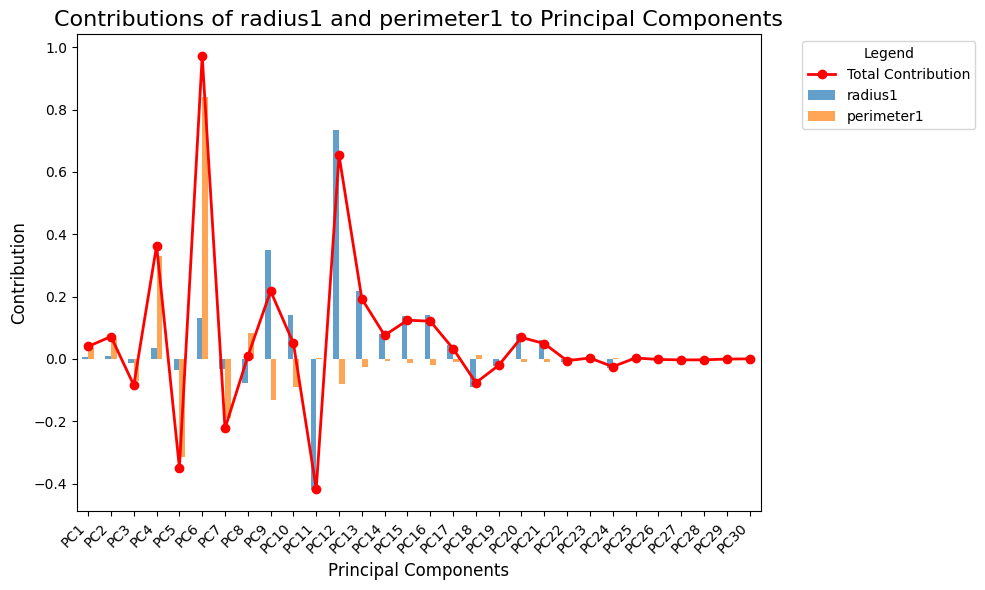

In [ ]:
# Visualize/plot the shared variance between the feature pair
fig, ax = plt.subplots(figsize=(10, 6))
pair_contributions[[feature1, feature2]].plot(kind='bar', ax=ax, alpha=0.7, label=[feature1, feature2])

# Overlay the total contributions onto the plot
pair_contributions['Total'].plot(kind='line', ax=ax, color='red', linewidth=2, marker='o', label="Total Contribution")

# Add labels and title
plt.title(f"Contributions of {feature1} and {feature2} to Principal Components", fontsize=16)
plt.xlabel("Principal Components", fontsize=12)
plt.ylabel("Contribution", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<p>Finally, I summed the total of contributions to the variance that is shared by these two features.</p>

In [ ]:
total_contribution_sum = pair_contributions['Total'].sum()
total_contribution_percentage = total_contribution_sum / total_contributions_all_features.sum()
print(f"Together, this feature pair has a total contribution of {total_contribution_sum} ({total_contribution_percentage}%).")

Together, this feature pair has a total contribution of 1.8447458269884114 (0.025935321001964048%).


<p>This is significantly lower than the individual variance contribution for each feature as this calculation only accounts for the shared variance of these features as a pair.</p>

### Step 10: Identifying an Outlier of Interest

<h4>Outlier criteria</h4>
<p>Due to my work in Problem 7, I was specifically interested in seeing the nature of an outlier in "perimeter3", which contains the largest perimeter for a single cell nucleus among all cell nuclei.  Hence, I wanted to find the single cell nucleus, across the dataset, with the largest perimeter.</p>
<p>Based on the scatter plot at the end of Problem 7, I found an outlier of interest, located around the figure of 250, hence, I created a query to single out this outlier by finding the "perimeter3" value above 250.</p>

In [ ]:
# YOUR CODE HERE

# Confirmation that this column corresponds with the maximum perimeter
# print(bcwd_names['24'])

# Outlier criteria
outlier_query = bcwd_renamed.query(f"`{bcwd_names['24']}` > 250")
# print(outlier_query)

<p>Next, I plotted the values of "perimeter3" against the target diagnosis column, then I highlighted the outlier as a red dot.  The results are as follows:</p>

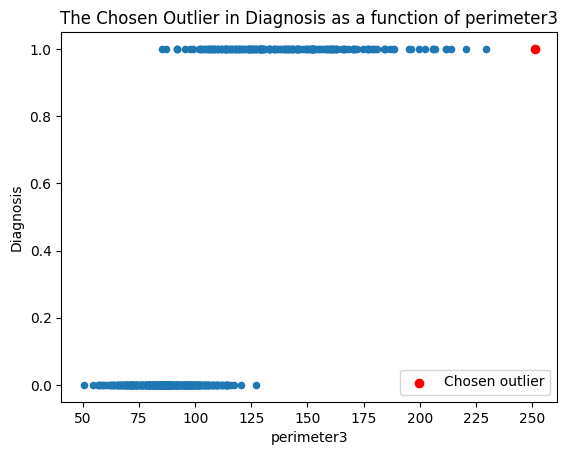

In [ ]:
bcwd_renamed.plot.scatter(bcwd_names['24'], bcwd_names['target'])
plt.scatter(outlier_query[bcwd_names['24']], outlier_query[bcwd_names['target']], color='red', label="Chosen outlier")
plt.legend()
plt.title("The Chosen Outlier in Diagnosis as a function of perimeter3")
plt.show()
plt.close()

<p>However, I wanted to investigate if this outlier was also an outlier in other columns related to the size of a breast mass.  Hence, I chose to generate scatterplots for the mean overall value, the standard error, and the maximum value for the radius, perimeter, and area of each breast mass, then colored the chosen outlier for the "perimeter3" (maximum value for a breast mass cell nucleus) column in red.</p>
<p>The results are as follows.</p>

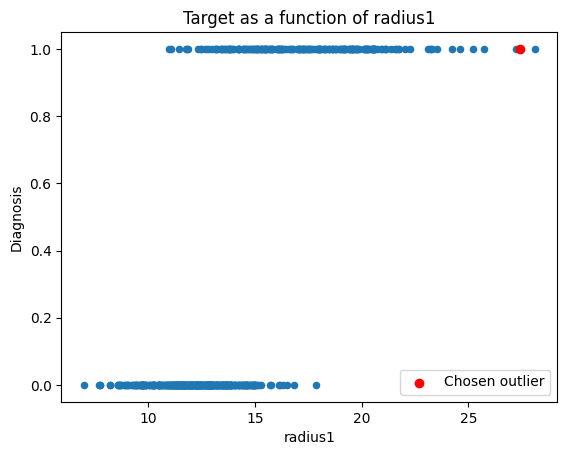

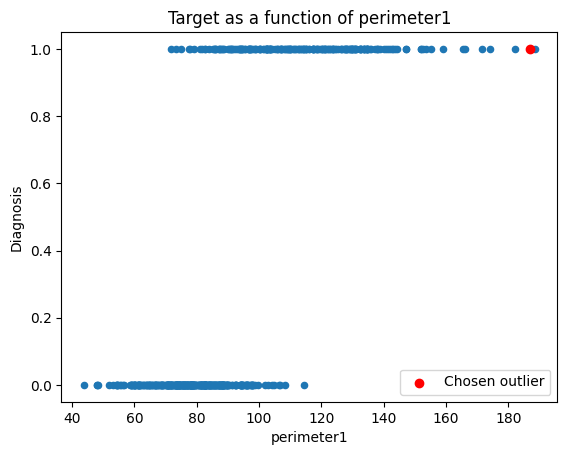

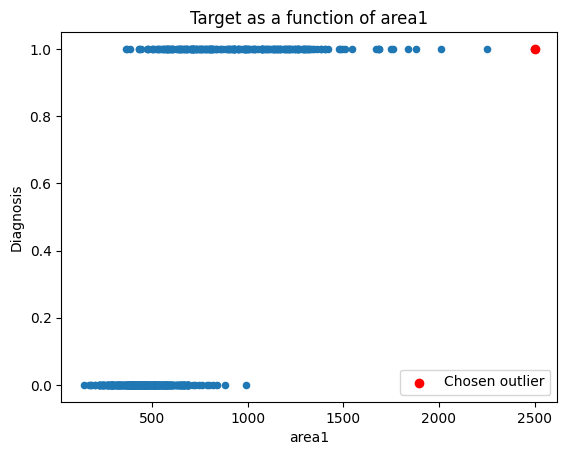

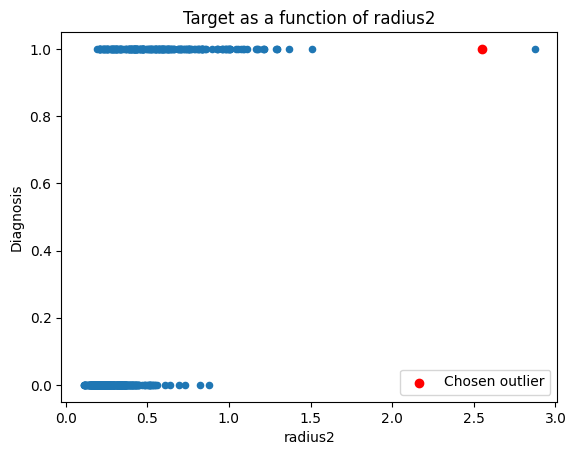

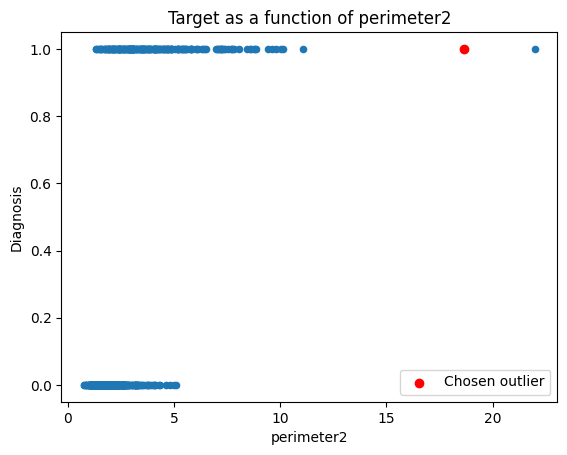

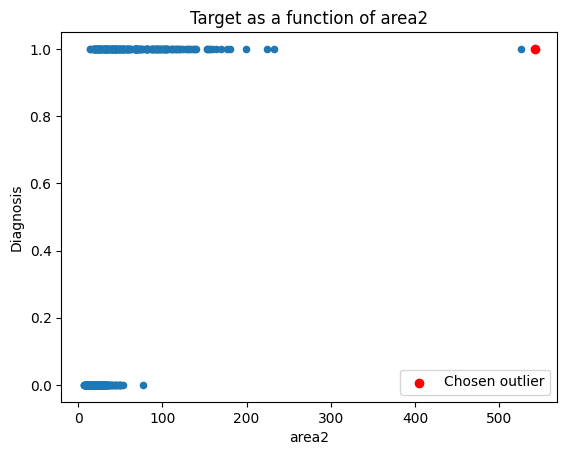

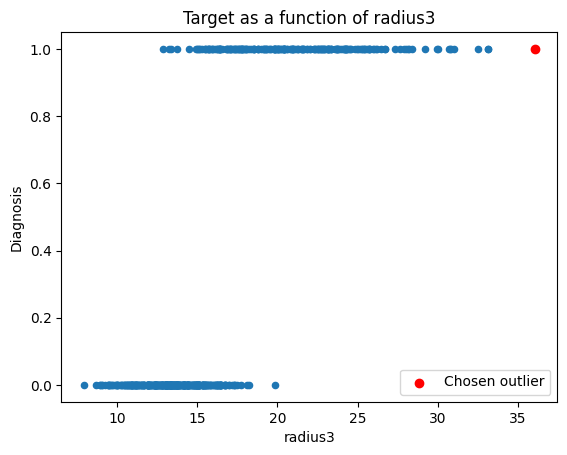

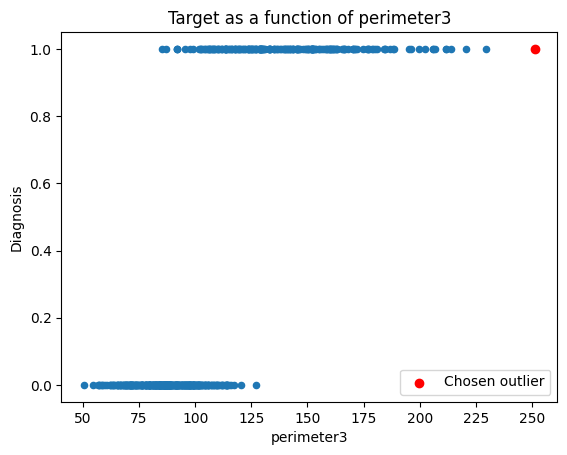

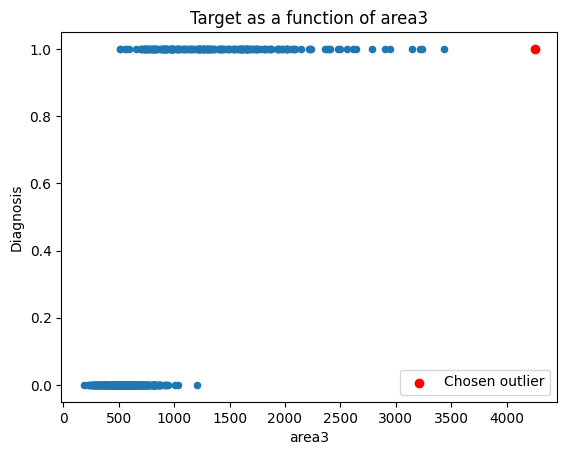

In [ ]:
size_col_list = [str(p2_names[1]), str(p2_names[3]), str(p2_names[4]), str(p2_names[11]), str(p2_names[13]), str(p2_names[14]), str(p2_names[21]), str(p2_names[23]), str(p2_names[24])]
# print(size_col_list)

for key in size_col_list:
    bcwd_renamed.plot.scatter(bcwd_names[key], bcwd_names['target'])
    plt.scatter(outlier_query[bcwd_names[key]], outlier_query[bcwd_names['target']], color='red', label="Chosen outlier")
    plt.legend()
    plt.title(f"Target as a function of {bcwd_names[key]}")
    plt.show()
    plt.close()

<p>For the target or Diagnosis value of 1, as I suspected, my chosen outlier appears to either be the maximum value of each of the size features for the Diagnosis value of 1 or very close to it.  This is the case despite the fact that the columns investigated denote the mean, standard error, and maximum value for each size feature of radius, perimeter, and area pertaining to the maximum cell nucleus value of a breast cell mass observation.  Thus, I am satisfied with the results of this investigation into this particular outlier.</p>